CO

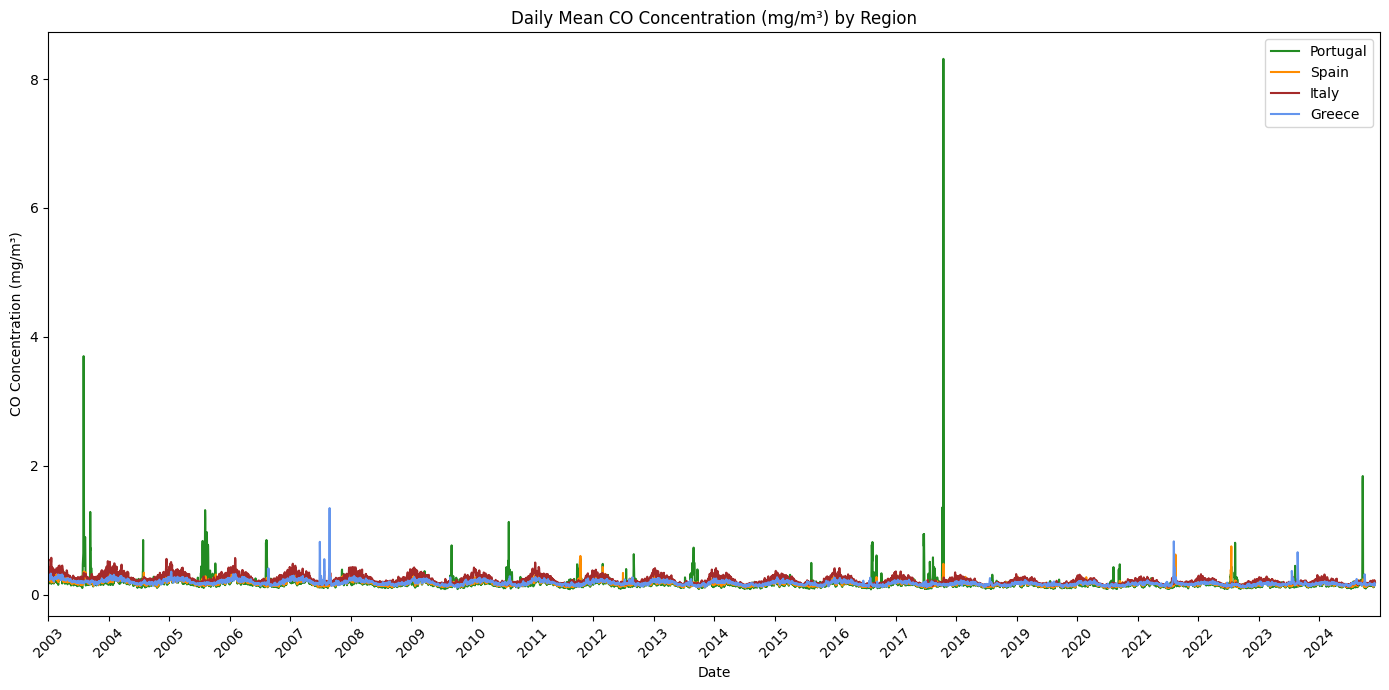

In [1]:
# Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
co_file = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load CO data and stack time ===
ds = xr.open_dataset(co_file)
co = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(co.sizes["time"]):
    y = int(co["Year"].values[i])
    m = int(co["Month"].values[i])
    d = int(co["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
co = co.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = co.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean CO Concentration (mg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("CO Concentration (mg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


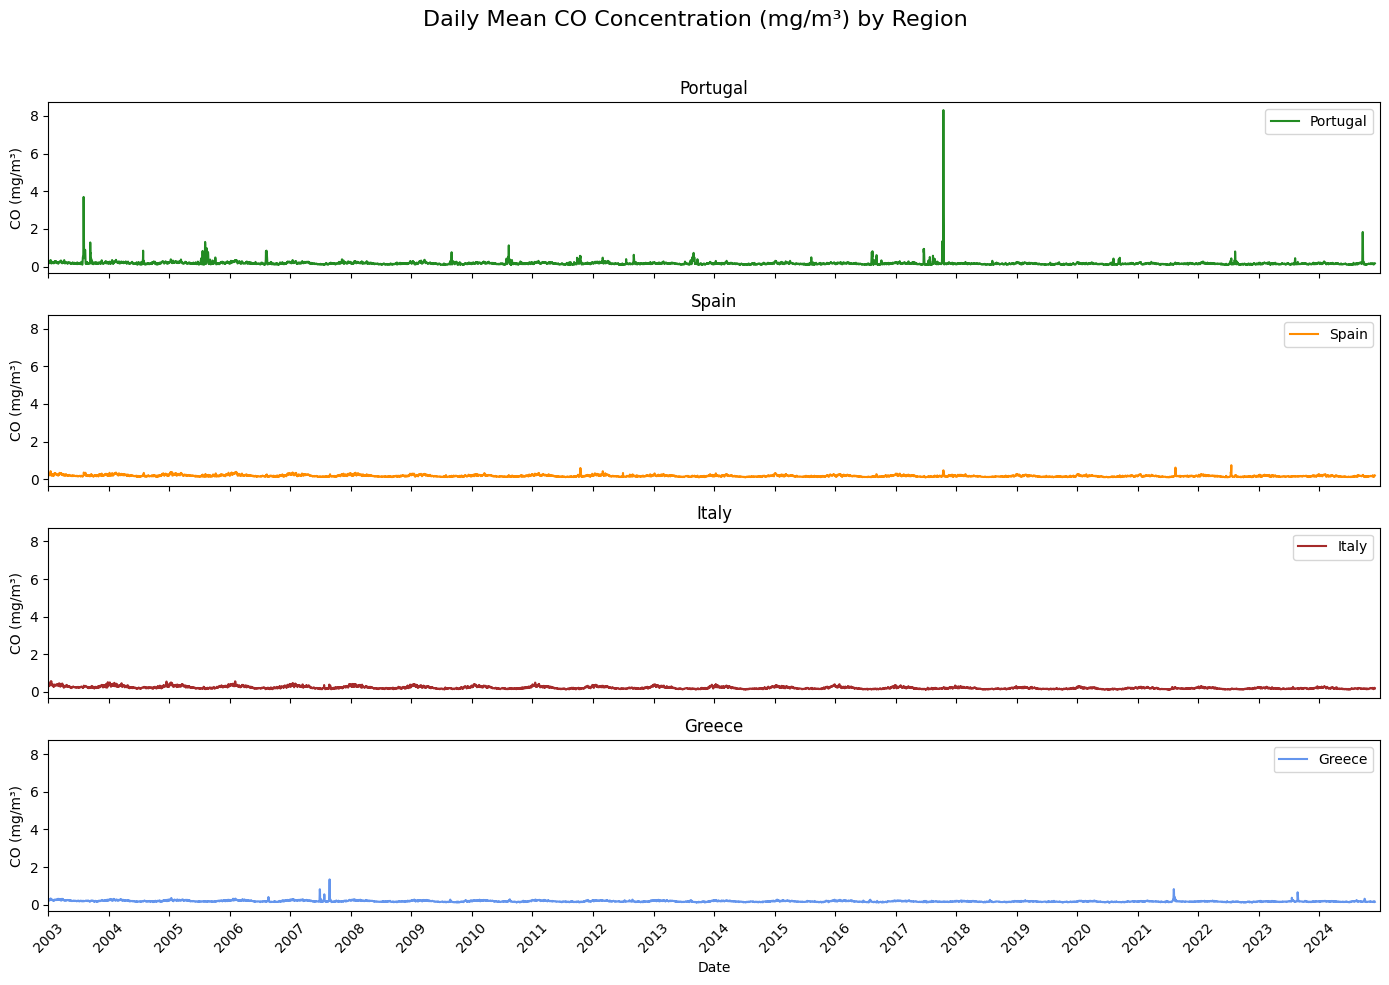

In [2]:
#Time series with daily averages by region separated

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
co_file = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load CO data and stack time ===
ds = xr.open_dataset(co_file)
co = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(co.sizes["time"]):
    y = int(co["Year"].values[i])
    m = int(co["Month"].values[i])
    d = int(co["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
co = co.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = co.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("CO (mg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean CO Concentration (mg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()



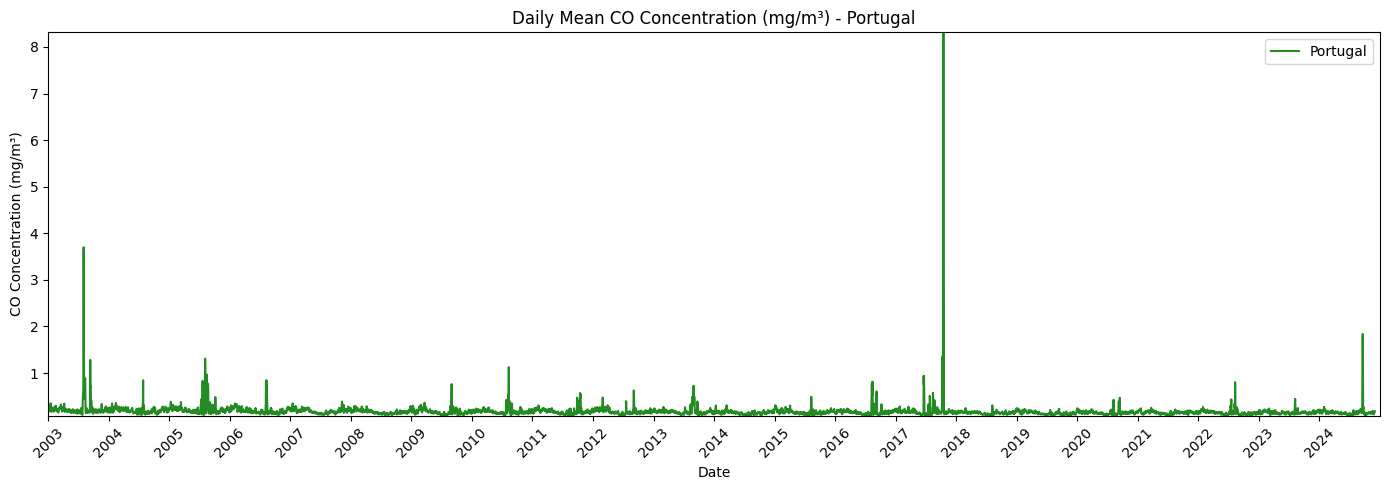

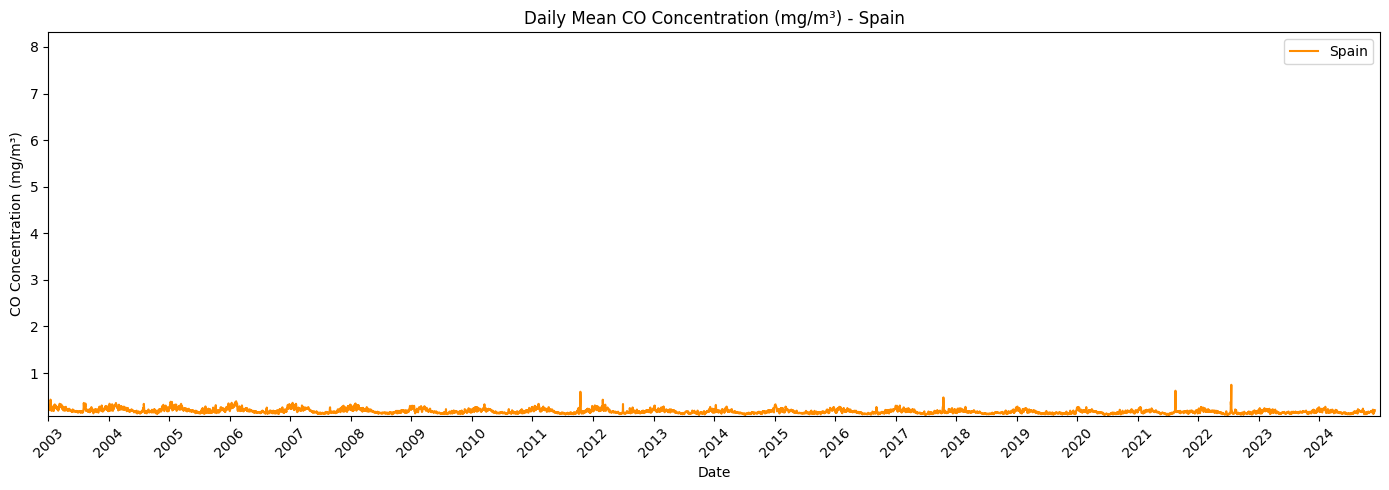

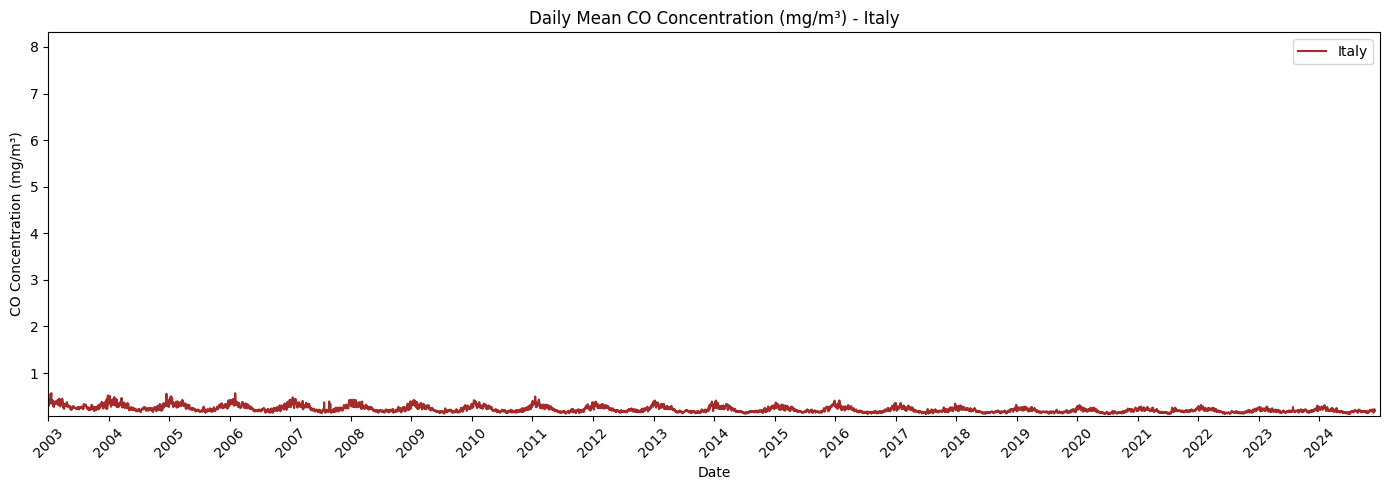

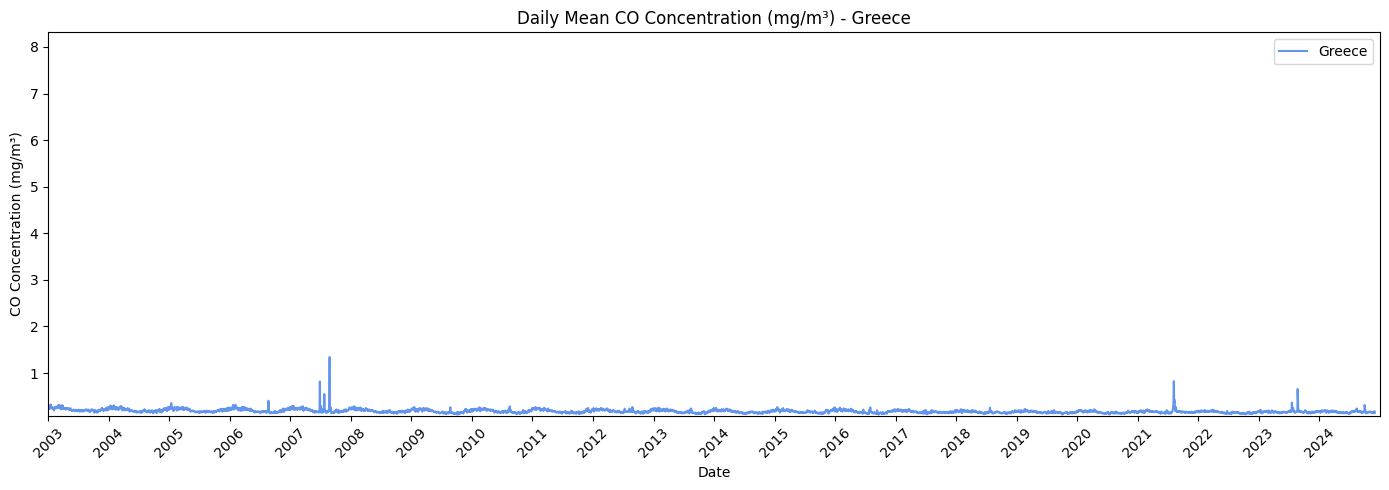

In [3]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
co_file = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load CO data and stack time ===
ds = xr.open_dataset(co_file)
co = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(co.sizes["time"]):
    y = int(co["Year"].values[i])
    m = int(co["Month"].values[i])
    d = int(co["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
co = co.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = co.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean CO Concentration (mg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("CO Concentration (mg/m³)")
    plt.ylim(ymin, ymax)  # Keep the same y-axis across all figures
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


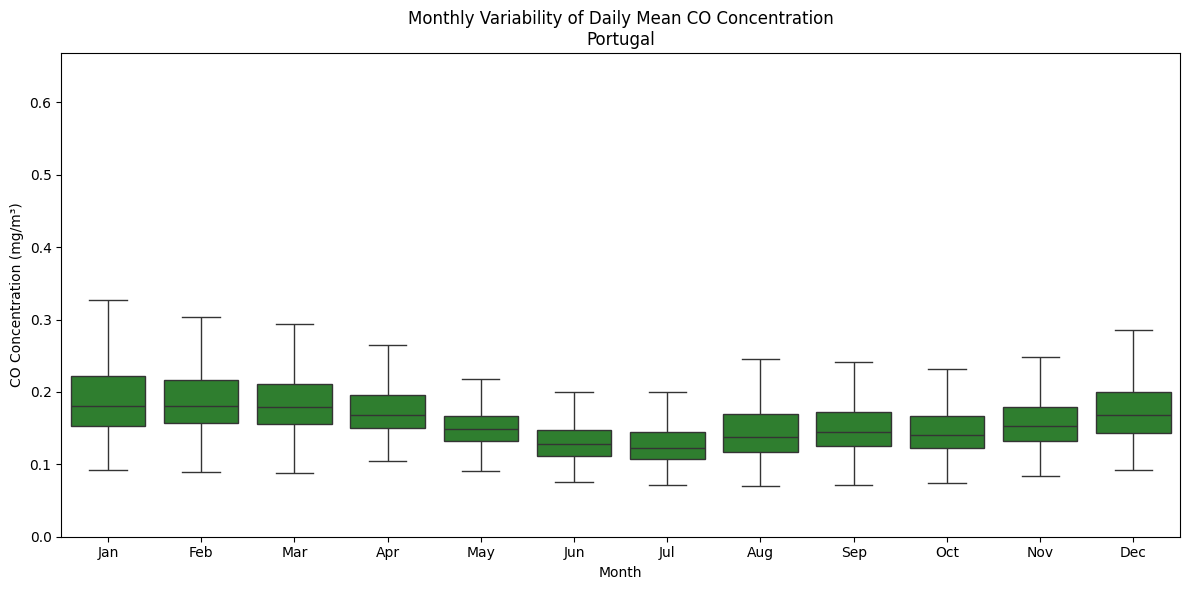

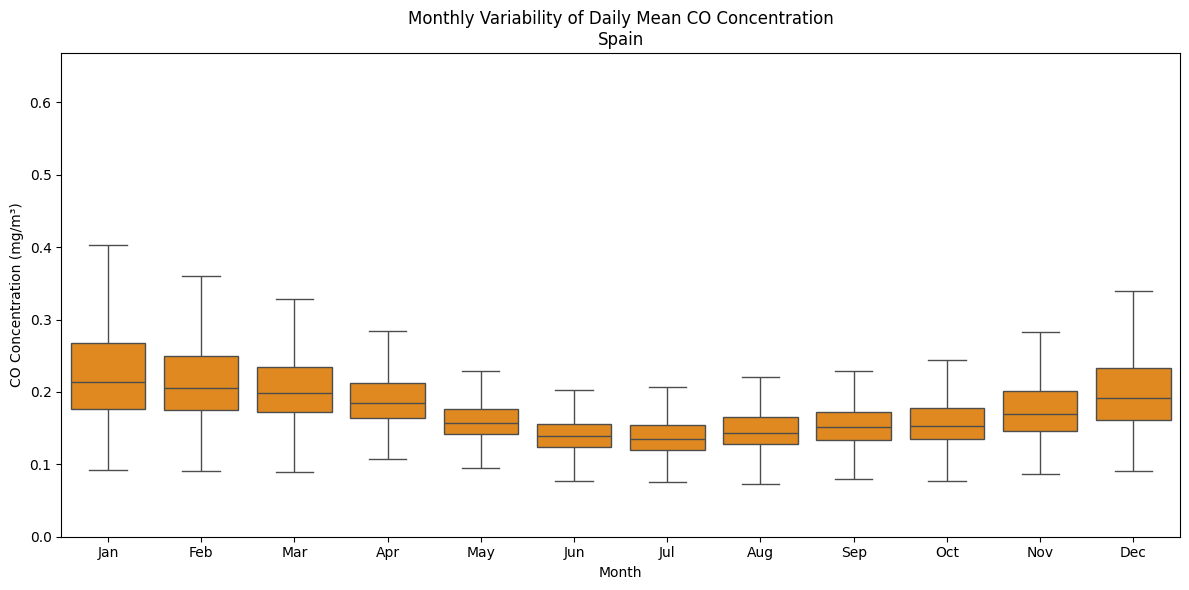

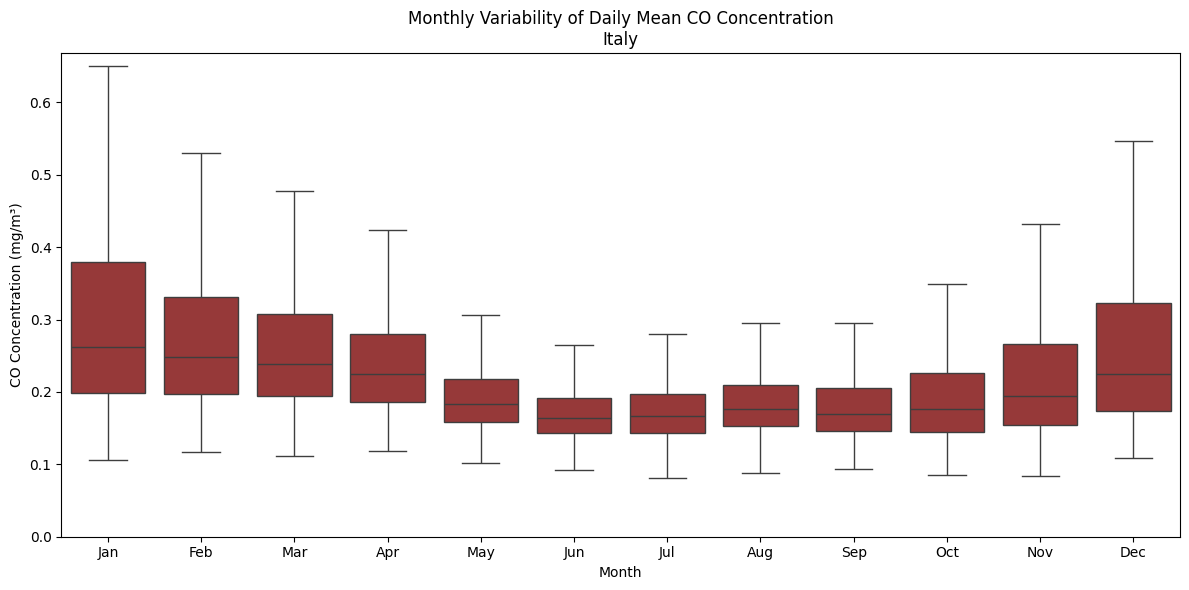

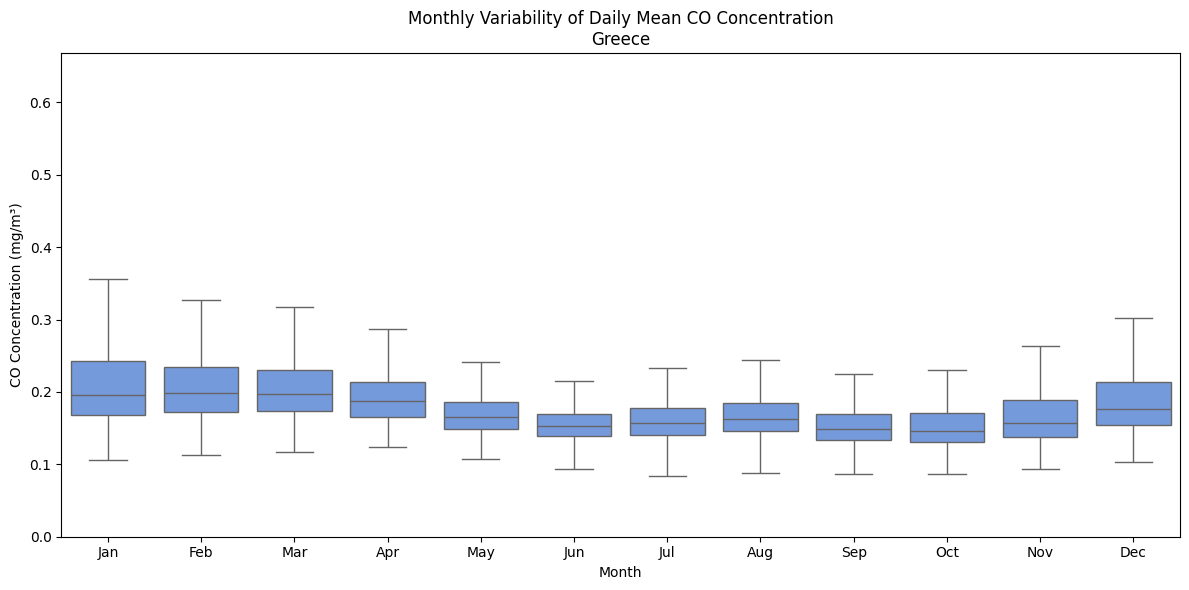

In [39]:
#Boxplot variability by month for every year with same y axis

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
co_file = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

ds = xr.open_dataset(co_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: calculate global Y-axis limits ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    co = ds["Mean"].where(mask)
    co_stack = co.stack(space=("latitude", "longitude"))

    for month in range(1, 13):
        values = co_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_values.extend(values)

y_min = 0
y_max = np.percentile(all_values, 99.5) * 1.1  # avoid extreme outliers

# === Second pass: plot each region ===
for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    co = ds["Mean"].where(mask)
    co_stack = co.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        values = co_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5, color=colors[region])
    plt.ylim(y_min, y_max)
    plt.title(f"Monthly Variability of Daily Mean CO Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("CO Concentration (mg/m³)")
    plt.tight_layout()
    plt.show()

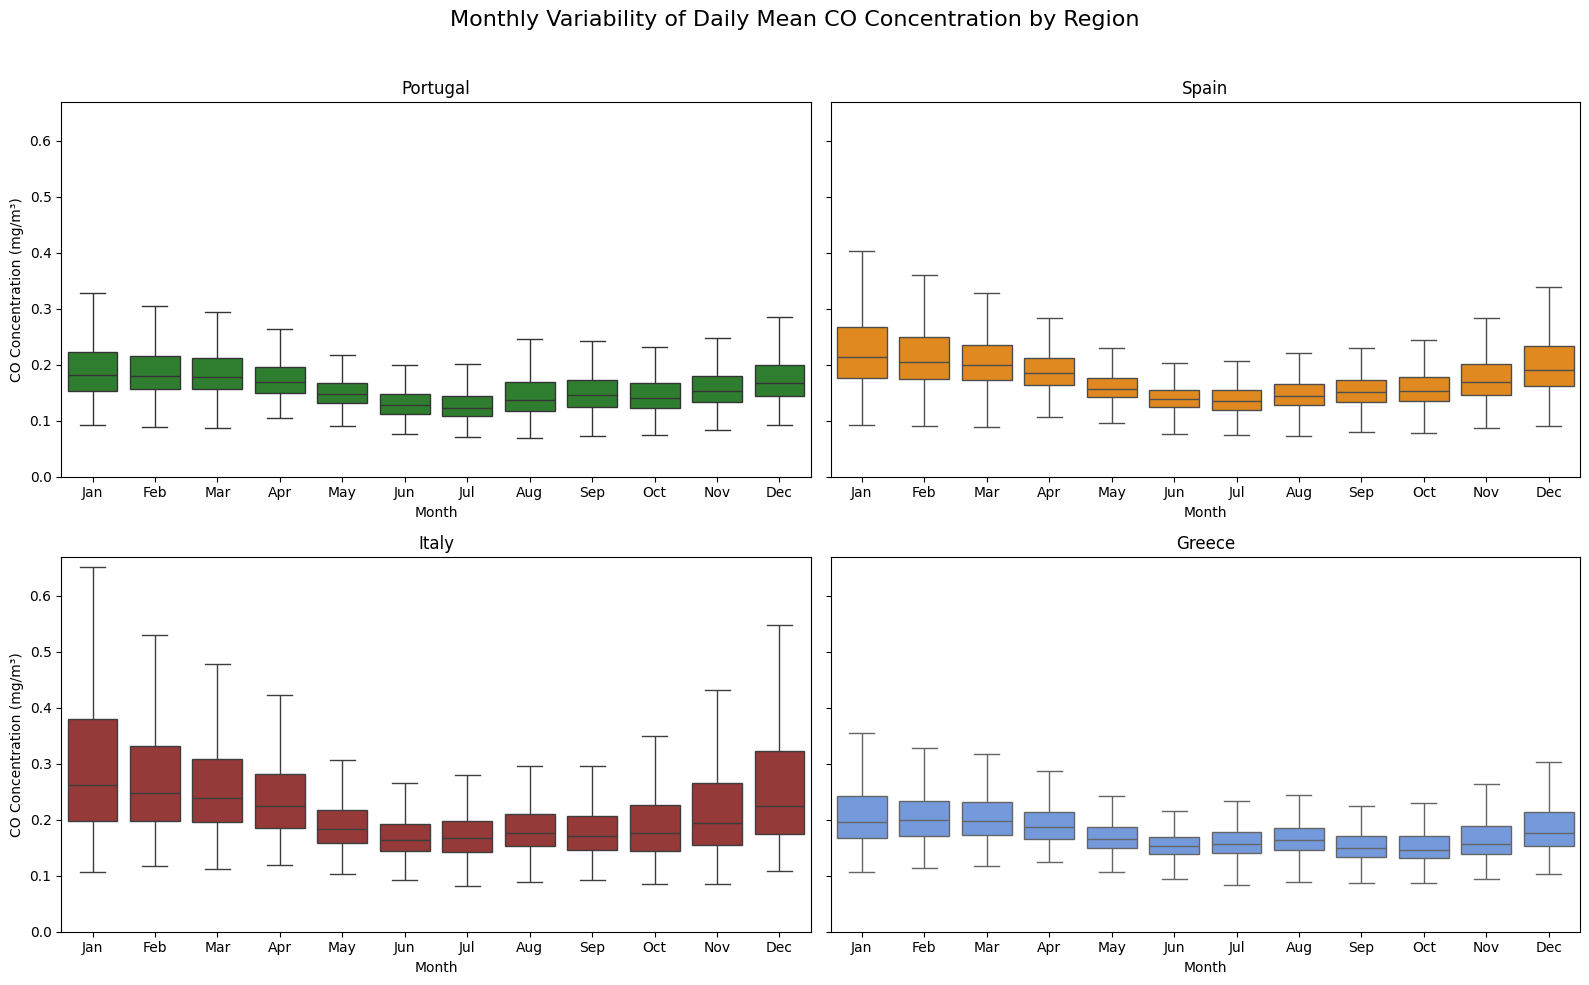

In [ ]:
#Boxplot with same y axis all together

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
co_file = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors ===
colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

# === Load CO dataset ===
ds = xr.open_dataset(co_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Prepare all data and find global Y range ===
region_data = {}
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    co = ds["Mean"].where(mask)
    co_stack = co.stack(space=("latitude", "longitude"))

    region_monthly = []

    for month in range(1, 13):
        values = co_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        region_monthly.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values,
            "Region": [region] * len(values)
        }))
        all_values.extend(values)

    region_data[region] = pd.concat(region_monthly, ignore_index=True)

# === Global Y limits for shared axis ===
y_min = 0
y_max = np.percentile(all_values, 99.5) * 1.1  # avoid extreme outliers

# === Plotting ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, (region, df) in enumerate(region_data.items()):
    ax = axes[i]
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region], ax=ax)
    ax.set_title(region)
    ax.set_xlabel("Month")
    ax.set_ylabel("CO Concentration (mg/m³)")
    ax.set_ylim(y_min, y_max)

plt.suptitle("Monthly Variability of Daily Mean CO Concentration by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [35]:
#Exceedances

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
co_file = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(co_file)

threshold = 4.0  # mg/m³

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    co = ds["Mean"].where(mask)

    # Calculate spatial average daily mean CO
    regional_mean = co.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="CO_mean").reset_index()
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["CO_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove4")
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove4").fillna(0).astype(int)
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean CO concentration exceeds 4 mg/m³:\n")
print(table)




Number of days per year where daily mean CO concentration exceeds 4 mg/m³:

Region  Portugal
Year            
2017           1
Total          1


NO2

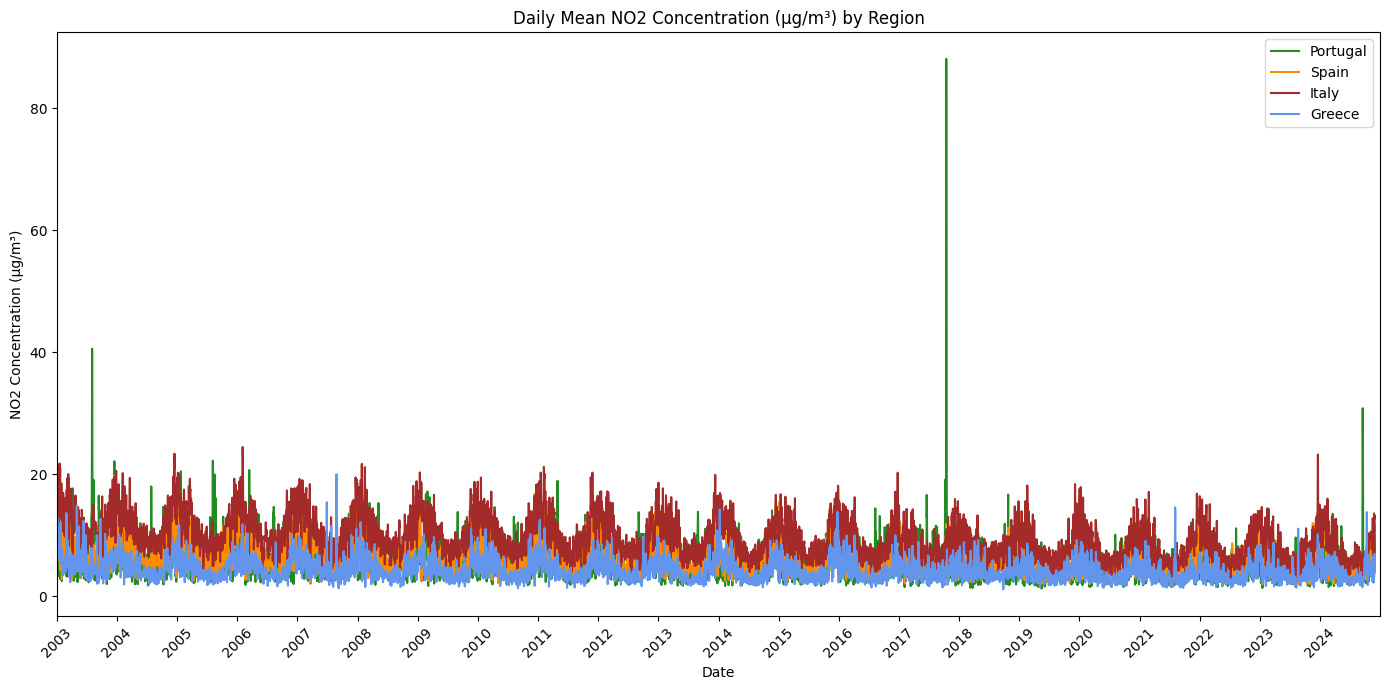

In [7]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no2_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO2 data and stack time ===
ds = xr.open_dataset(no2_file)
no2 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no2.sizes["time"]):
    y = int(no2["Year"].values[i])
    m = int(no2["Month"].values[i])
    d = int(no2["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no2 = no2.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no2.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean NO2 Concentration (µg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


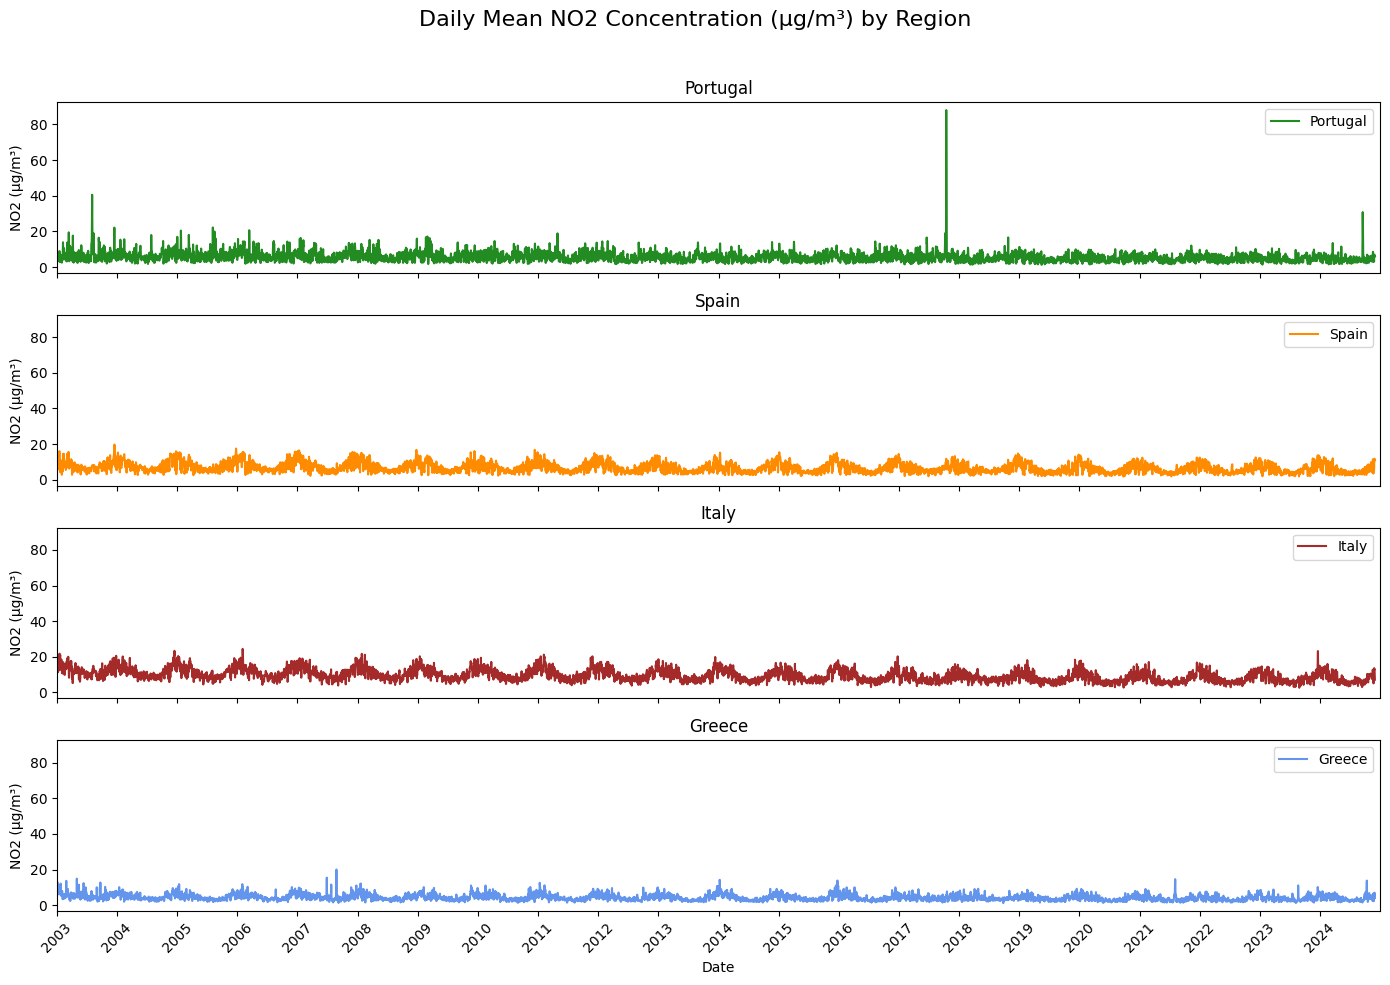

In [8]:
#Time series with daily averages by region separated

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no2_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO2 data and stack time ===
ds = xr.open_dataset(no2_file)
no2 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no2.sizes["time"]):
    y = int(no2["Year"].values[i])
    m = int(no2["Month"].values[i])
    d = int(no2["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no2 = no2.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no2.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("NO2 (µg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean NO2 Concentration (µg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()



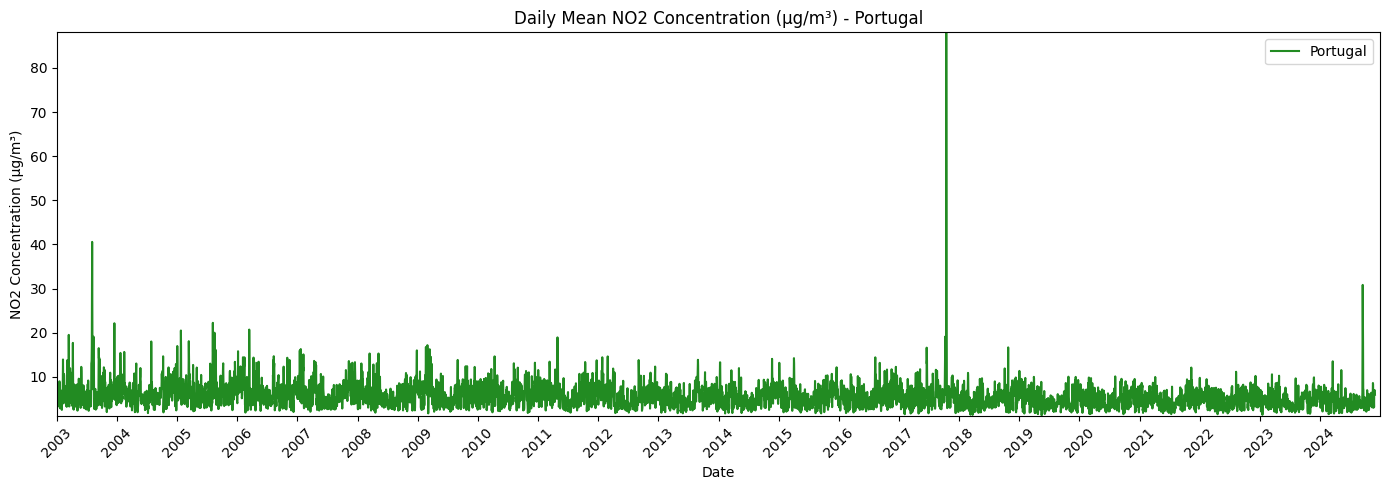

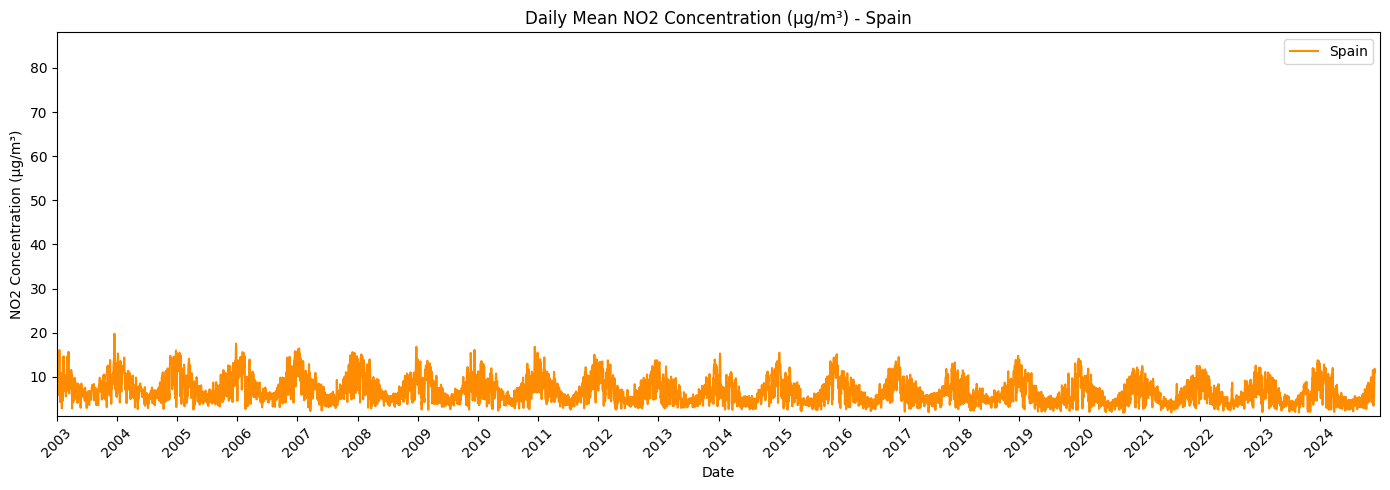

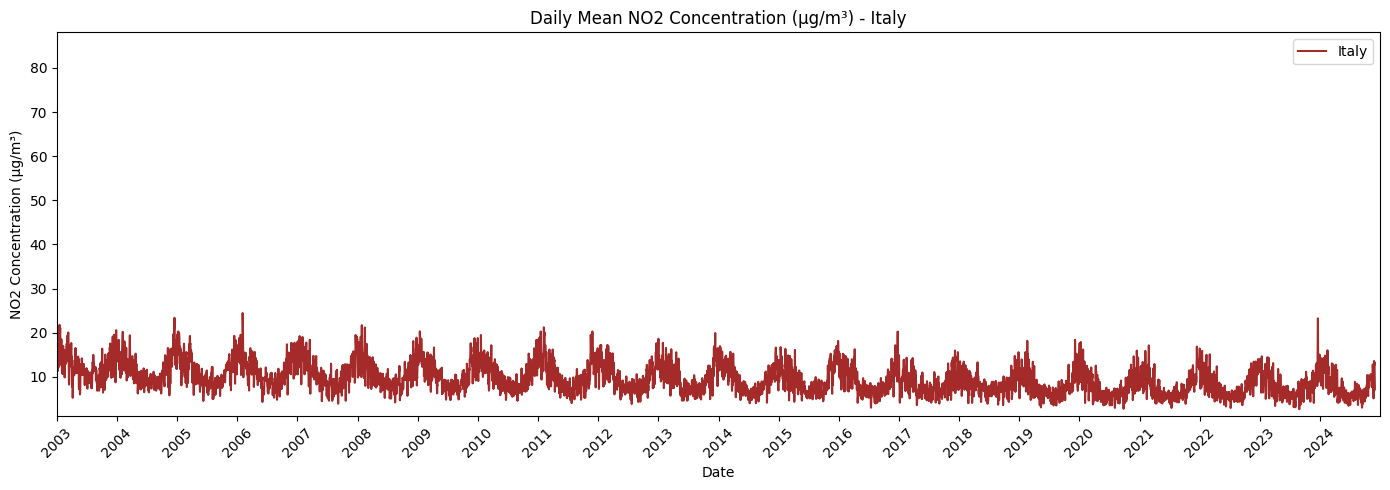

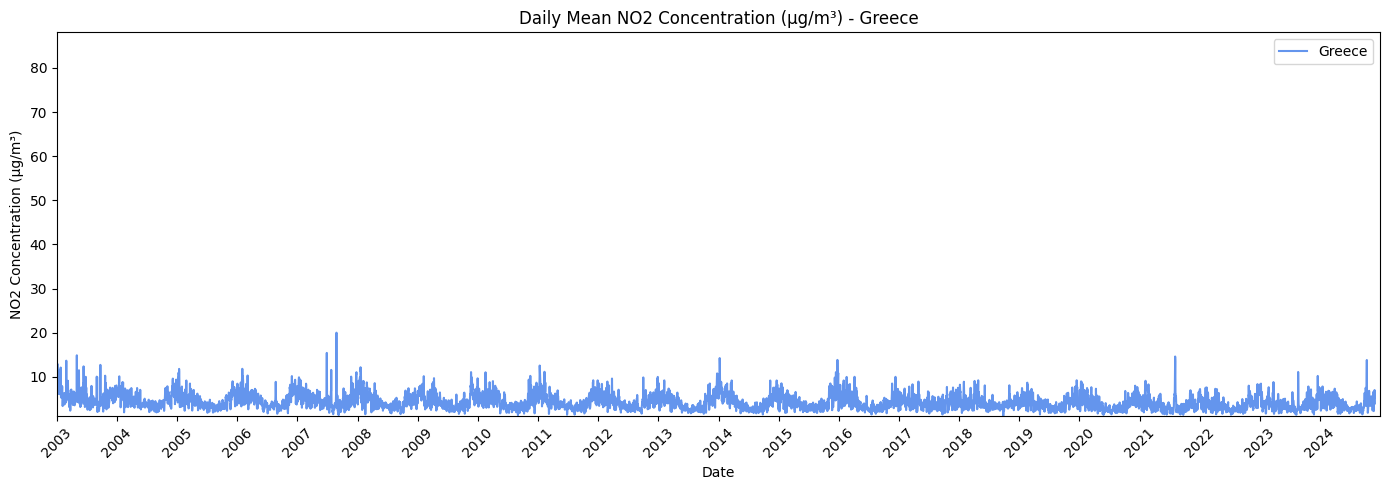

In [9]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no2_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO2 data and stack time ===
ds = xr.open_dataset(no2_file)
no2 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no2.sizes["time"]):
    y = int(no2["Year"].values[i])
    m = int(no2["Month"].values[i])
    d = int(no2["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no2 = no2.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no2.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean NO2 Concentration (µg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("NO2 Concentration (µg/m³)")
    plt.ylim(ymin, ymax)  # Keep the same y-axis across all figures
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


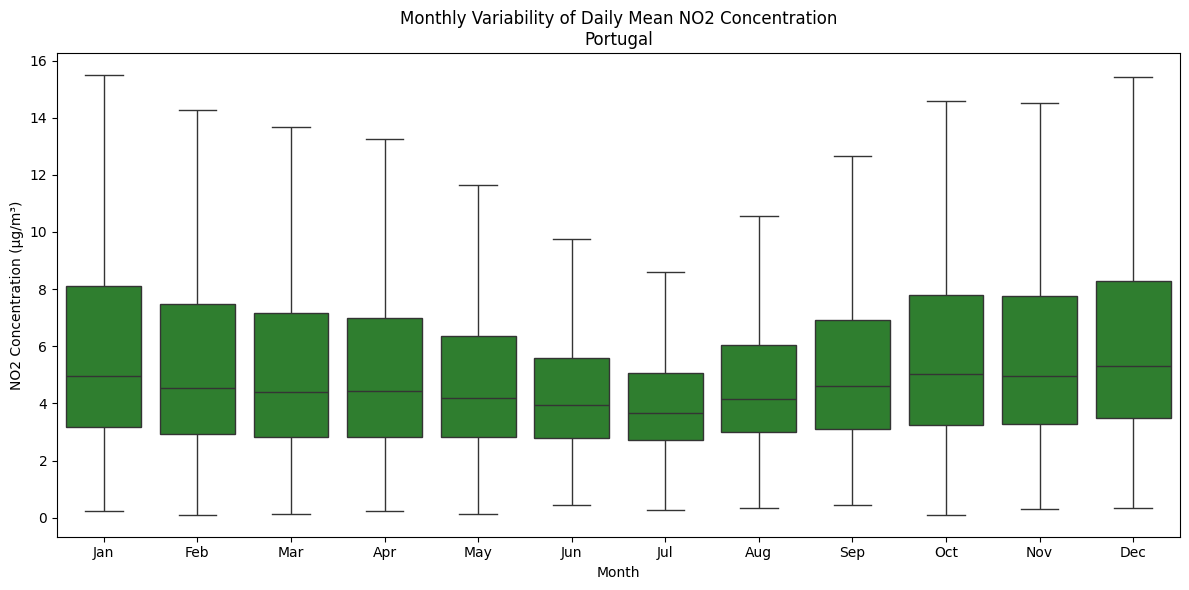

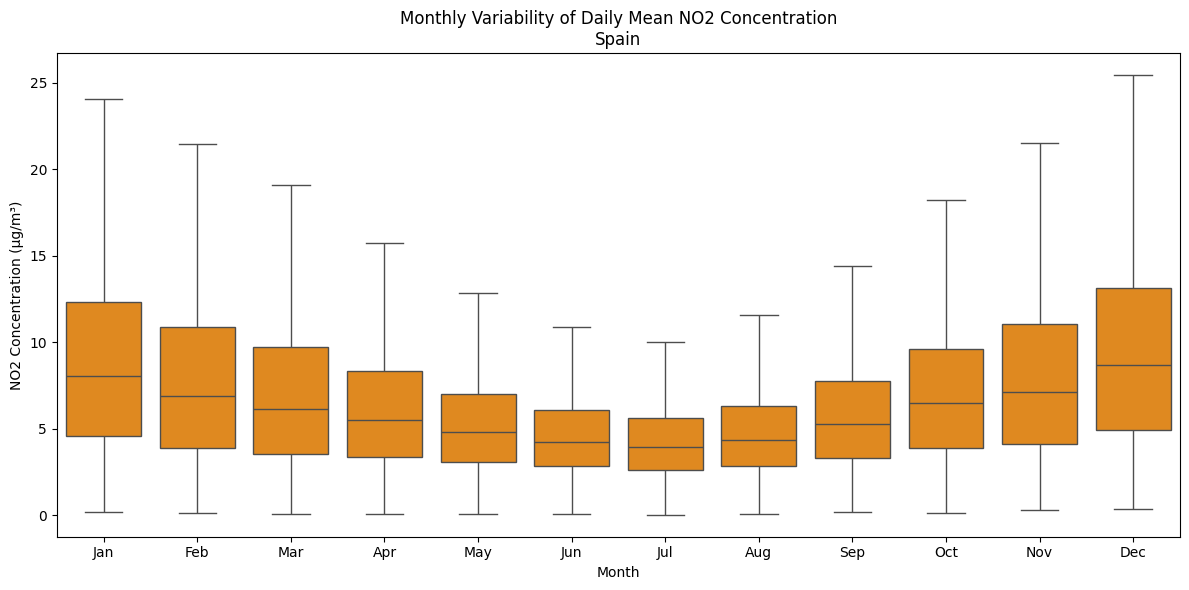

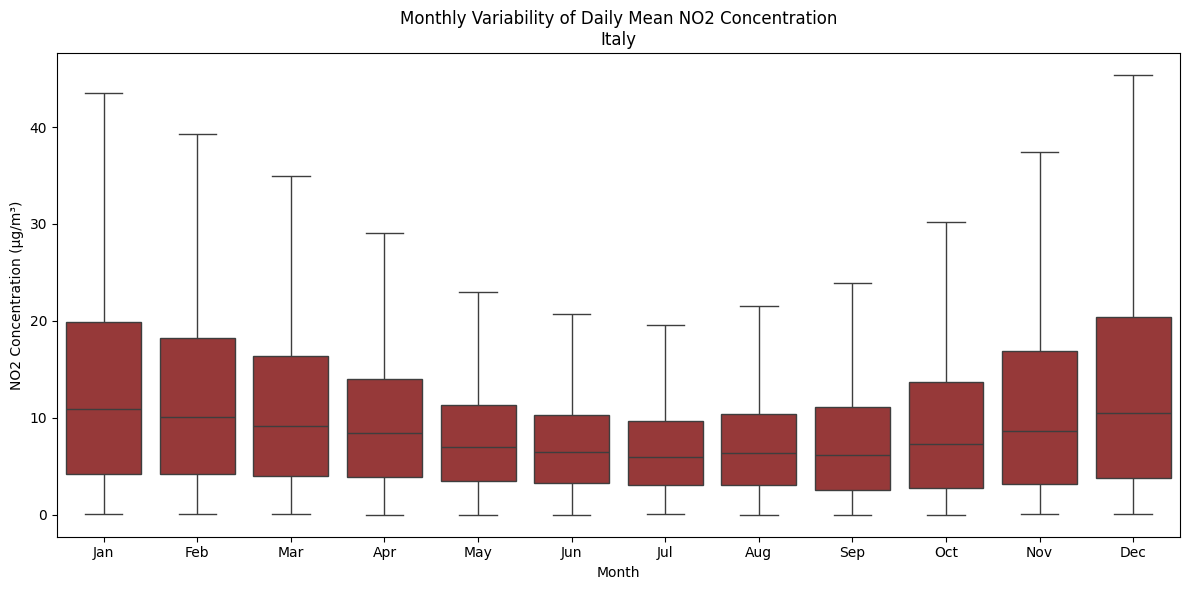

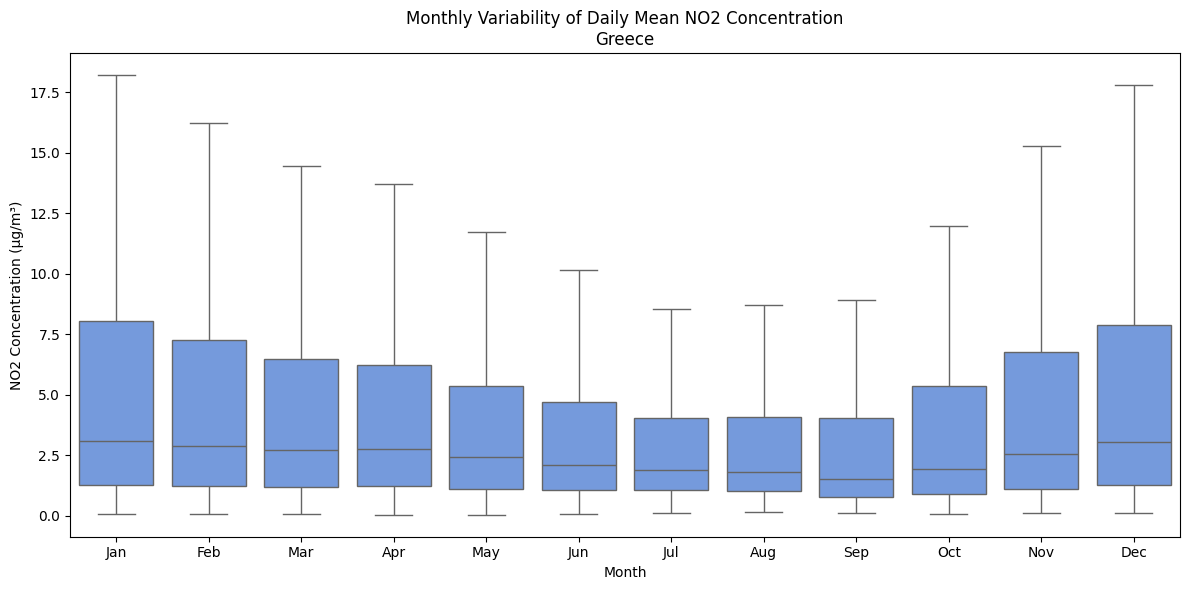

In [40]:
#Boxplot variability by month for every year

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no2_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors for plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# === Load NO2 data ===
ds = xr.open_dataset(no2_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Loop over regions ===
for region, mask_path in mask_files.items():
    # Load mask
    mask = xr.open_dataset(mask_path)["mask"] == 1

    # Apply mask to daily mean NO"
    no2 = ds["Mean"].where(mask)

    # Stack spatial dimensions
    no2_stack = no2.stack(space=("latitude", "longitude"))

    # Prepare data for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = no2_stack.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]  # Remove NaNs
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region])
    plt.title(f"Monthly Variability of Daily Mean NO2 Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("NO2 Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()



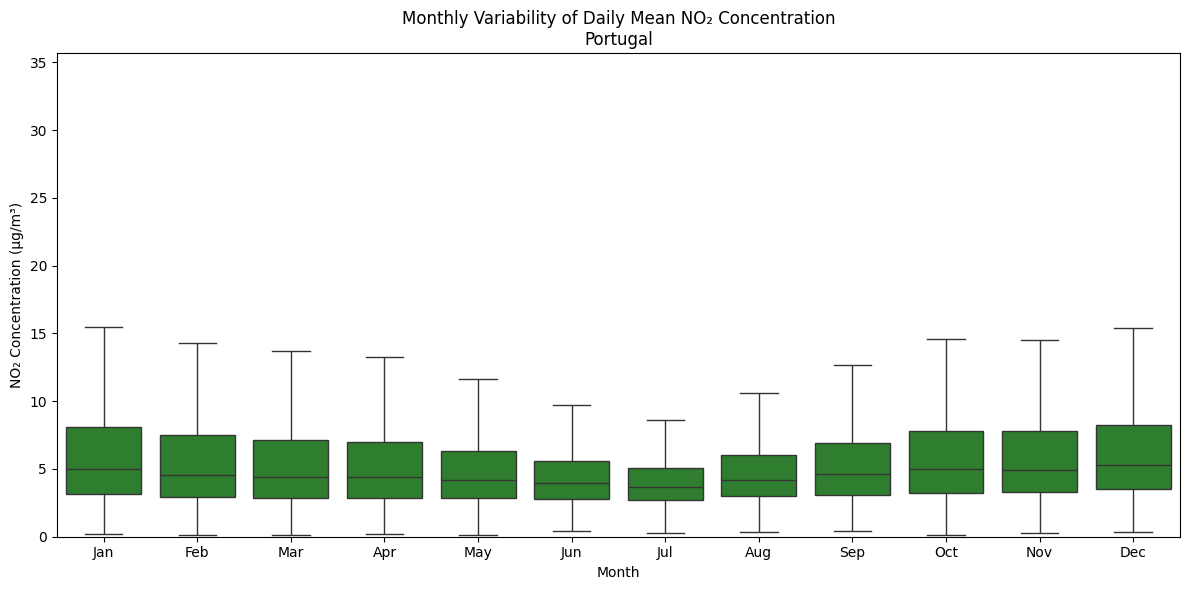

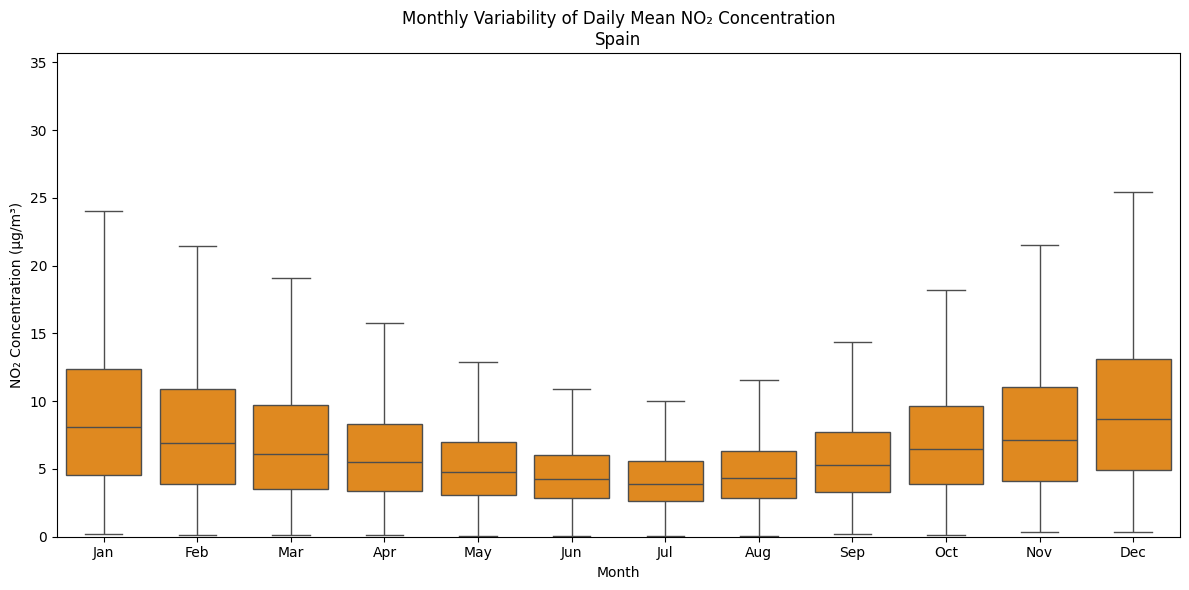

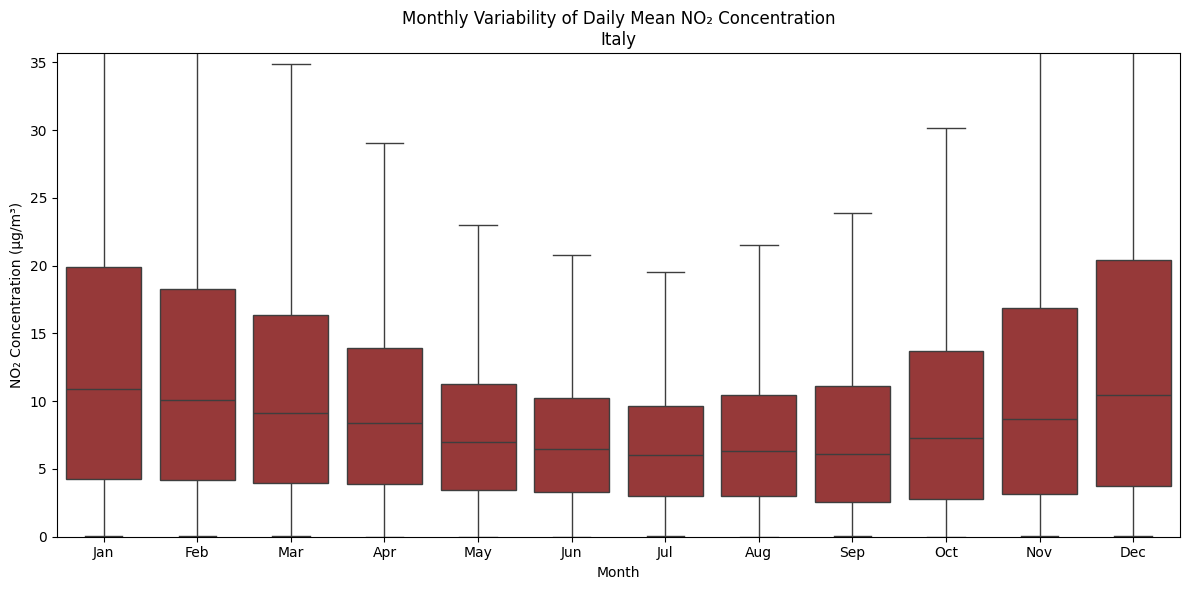

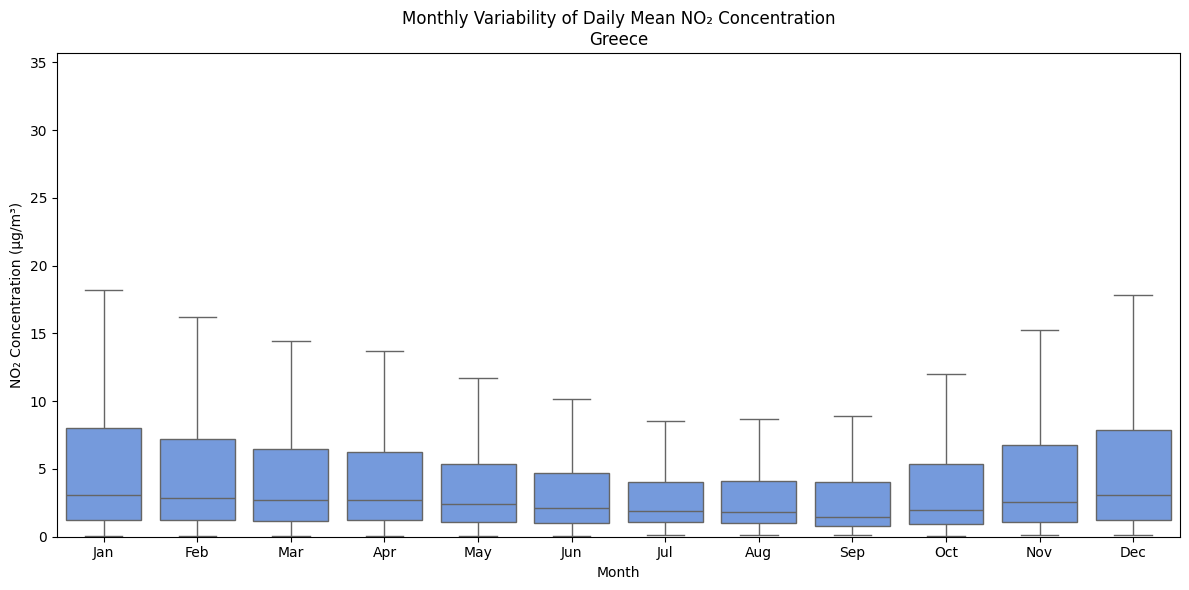

In [46]:
# Boxplot variability by month for every year with same y axis – NO₂ in µg/m³
#NOT CORRECT BUT THE SAME AS CO

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no2_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

ds = xr.open_dataset(no2_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: calculate global Y-axis limits ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no2 = ds["Mean"].where(mask)
    no2_stack = no2.stack(space=("latitude", "longitude"))

    for month in range(1, 13):
        values = no2_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_values.extend(values)

y_min = 0
y_max = np.percentile(all_values, 99.5) * 1.1  # avoid extreme outliers

# === Second pass: plot each region ===
for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no2 = ds["Mean"].where(mask)
    no2_stack = no2.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        values = no2_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5, color=colors[region])
    plt.ylim(y_min, y_max)
    plt.title(f"Monthly Variability of Daily Mean NO₂ Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("NO₂ Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()


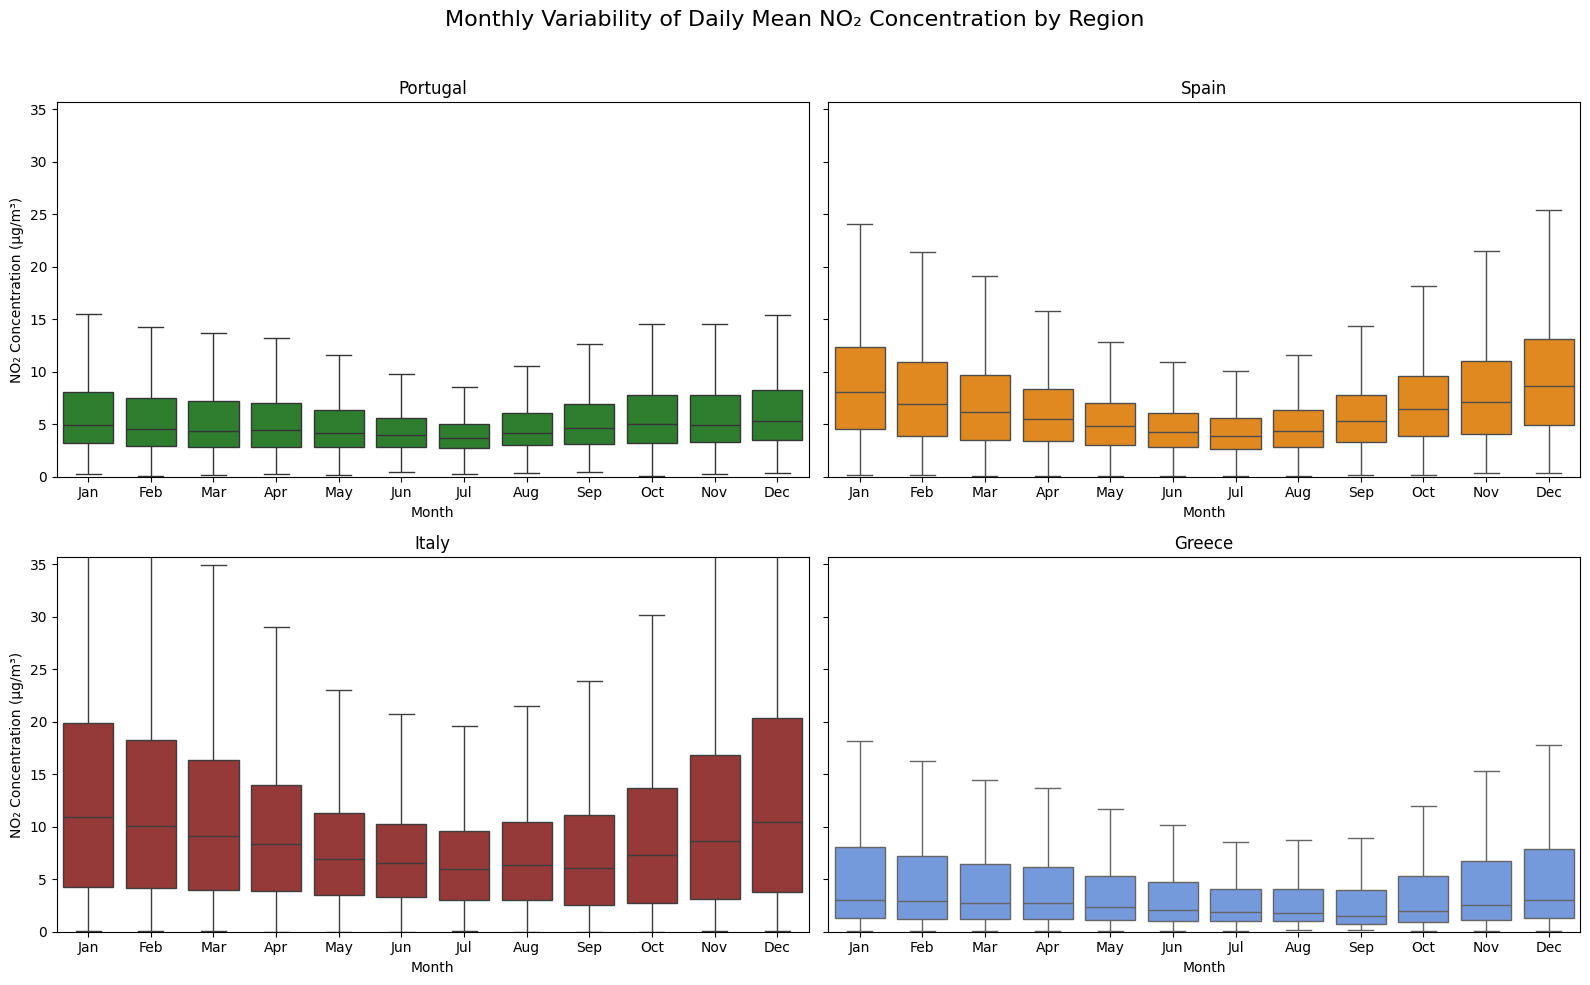

In [ ]:
#Boxplot with same y axis all together
#NOT CORRECT BUT THE SAME AS CO

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no2_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"  # Update if different
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors ===
colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

# === Load NO2 dataset ===
ds = xr.open_dataset(no2_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Prepare all data and find global Y range ===
region_data = {}
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no2 = ds["Mean"].where(mask)
    no2_stack = no2.stack(space=("latitude", "longitude"))

    region_monthly = []

    for month in range(1, 13):
        values = no2_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        region_monthly.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values,
            "Region": [region] * len(values)
        }))
        all_values.extend(values)

    region_data[region] = pd.concat(region_monthly, ignore_index=True)

# === Global Y limits for shared axis ===
y_min = 0
y_max = np.percentile(all_values, 99.5) * 1.1  # avoid extreme outliers

# === Plotting ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, (region, df) in enumerate(region_data.items()):
    ax = axes[i]
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region], ax=ax)
    ax.set_title(region)
    ax.set_xlabel("Month")
    ax.set_ylabel("NO₂ Concentration (µg/m³)")
    ax.set_ylim(y_min, y_max)

plt.suptitle("Monthly Variability of Daily Mean NO₂ Concentration by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [11]:
#Exceedances

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
no2_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(no2_file)

threshold = 25.0  # µg/m³

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    no2 = ds["Mean"].where(mask)

    # Calculate spatial average daily mean NO2
    regional_mean = no2.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="NO2_mean").reset_index()
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["NO2_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove4")
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove4").fillna(0).astype(int)
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean NO2 concentration exceeds 25 µg/m³:\n")
print(table)




Number of days per year where daily mean NO2 concentration exceeds 25 µg/m³:

Region  Portugal
Year            
2003           2
2017           2
2024           1
Total          5


NO

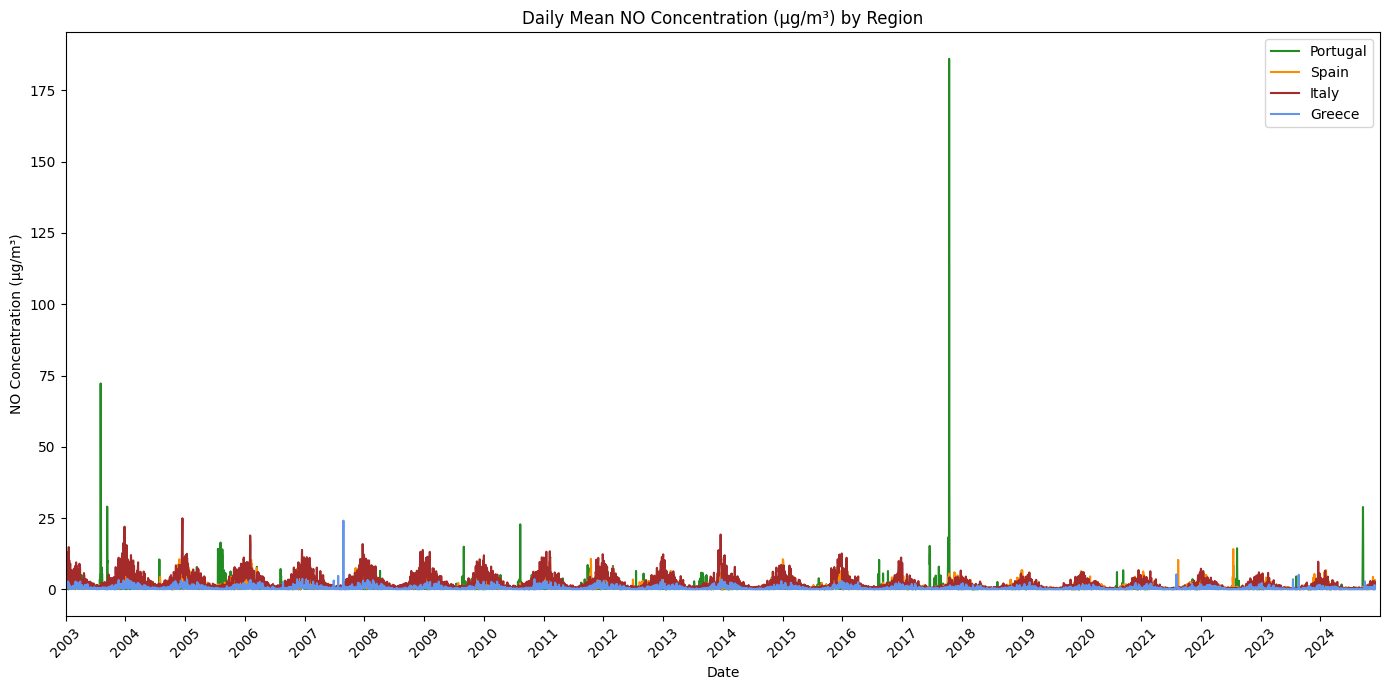

In [12]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO data and stack time ===
ds = xr.open_dataset(no_file)
no = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no.sizes["time"]):
    y = int(no["Year"].values[i])
    m = int(no["Month"].values[i])
    d = int(no["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no = no.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean NO Concentration (µg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("NO Concentration (µg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


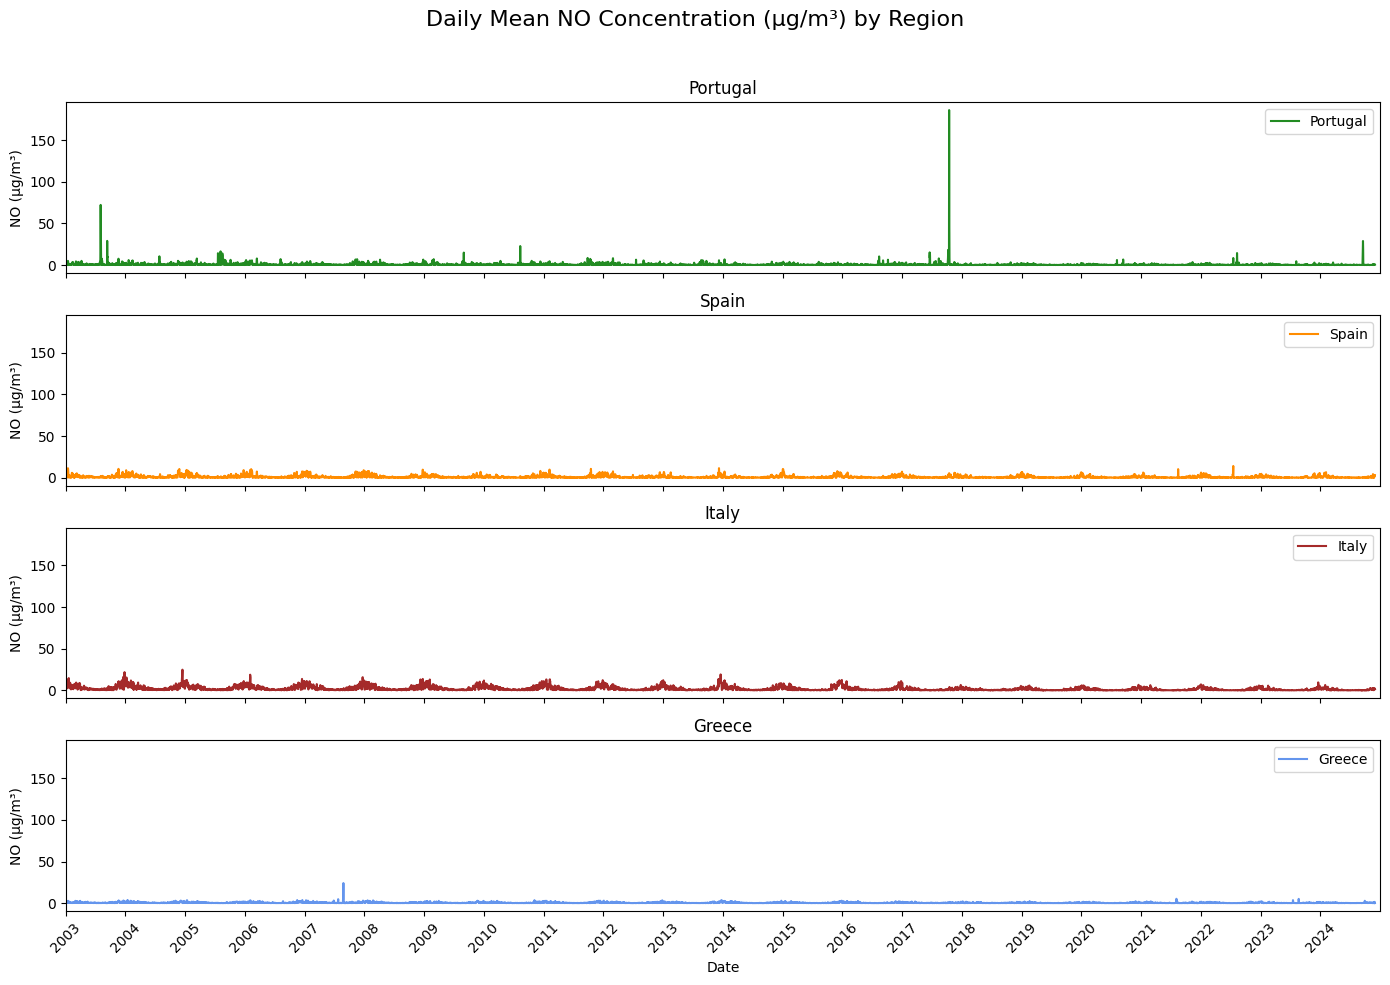

In [13]:
#Time series with daily averages by region separated

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO data and stack time ===
ds = xr.open_dataset(no_file)
no = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no.sizes["time"]):
    y = int(no["Year"].values[i])
    m = int(no["Month"].values[i])
    d = int(no["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no = no.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("NO (µg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean NO Concentration (µg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

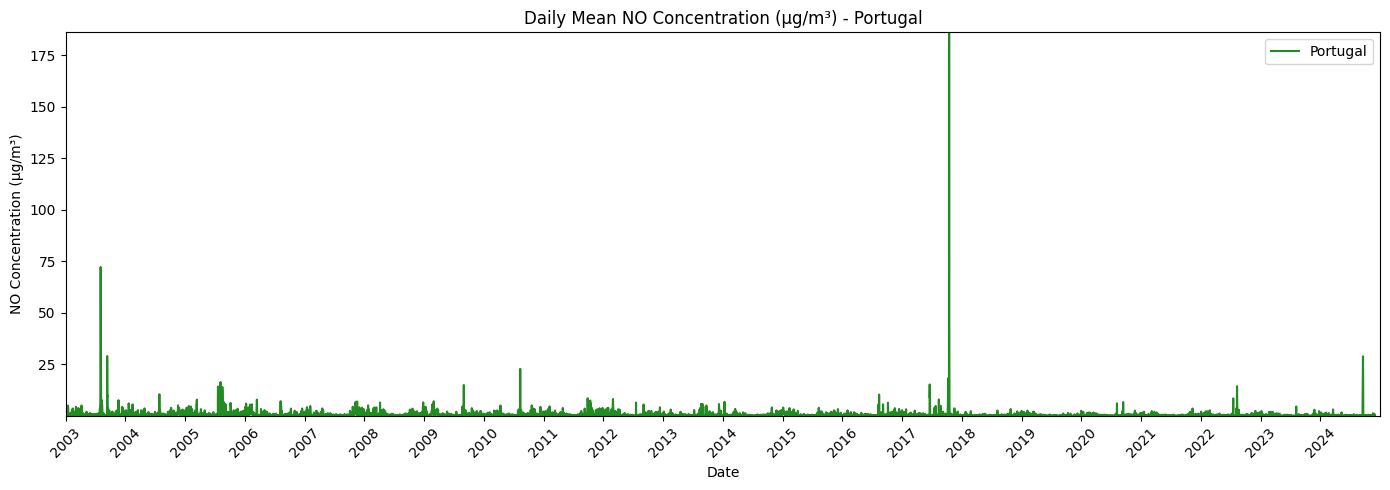

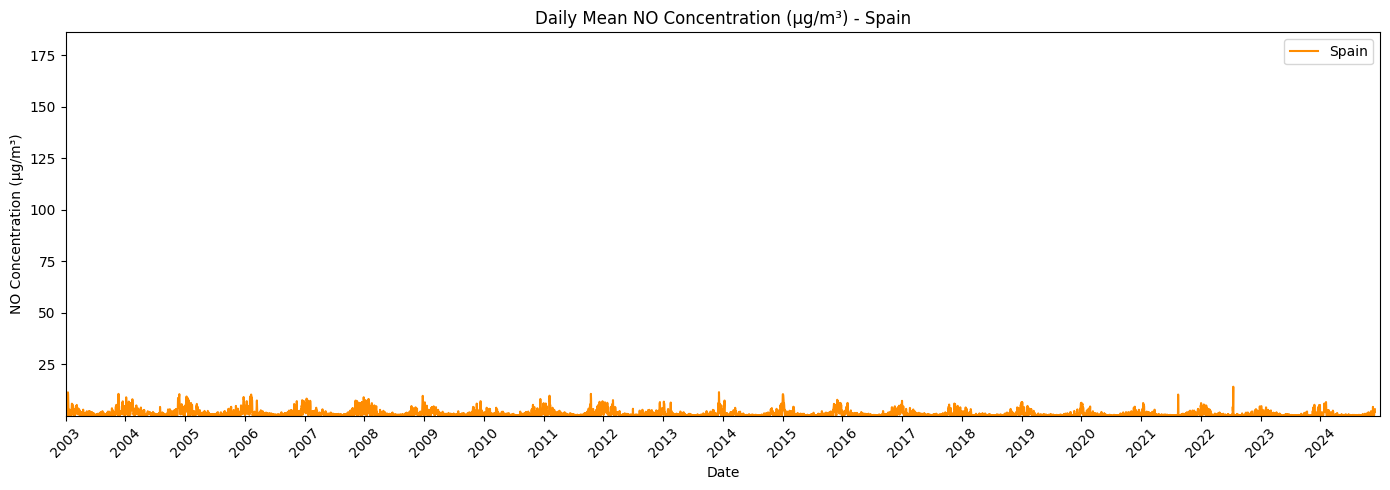

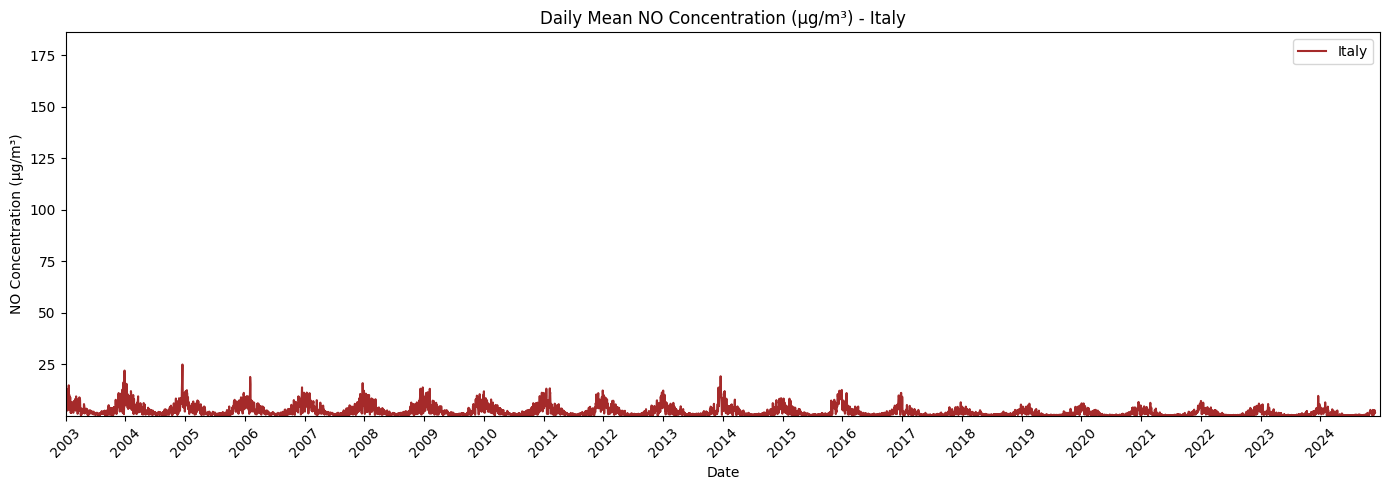

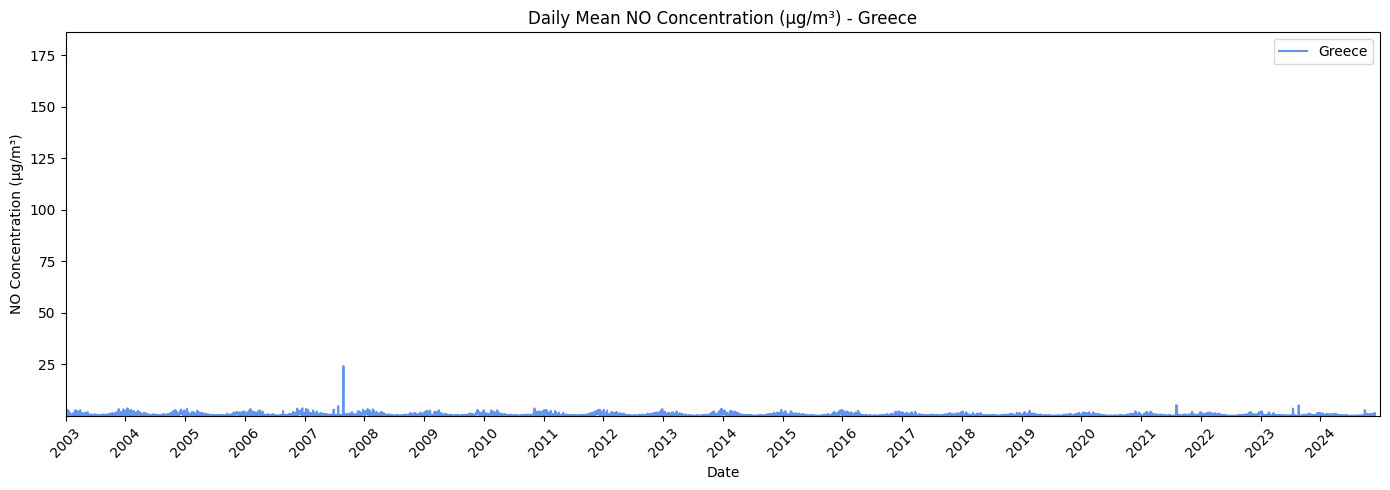

In [14]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO data and stack time ===
ds = xr.open_dataset(no_file)
no = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no.sizes["time"]):
    y = int(no["Year"].values[i])
    m = int(no["Month"].values[i])
    d = int(no["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no = no.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean NO Concentration (µg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("NO Concentration (µg/m³)")
    plt.ylim(ymin, ymax)  # Keep the same y-axis across all figures
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


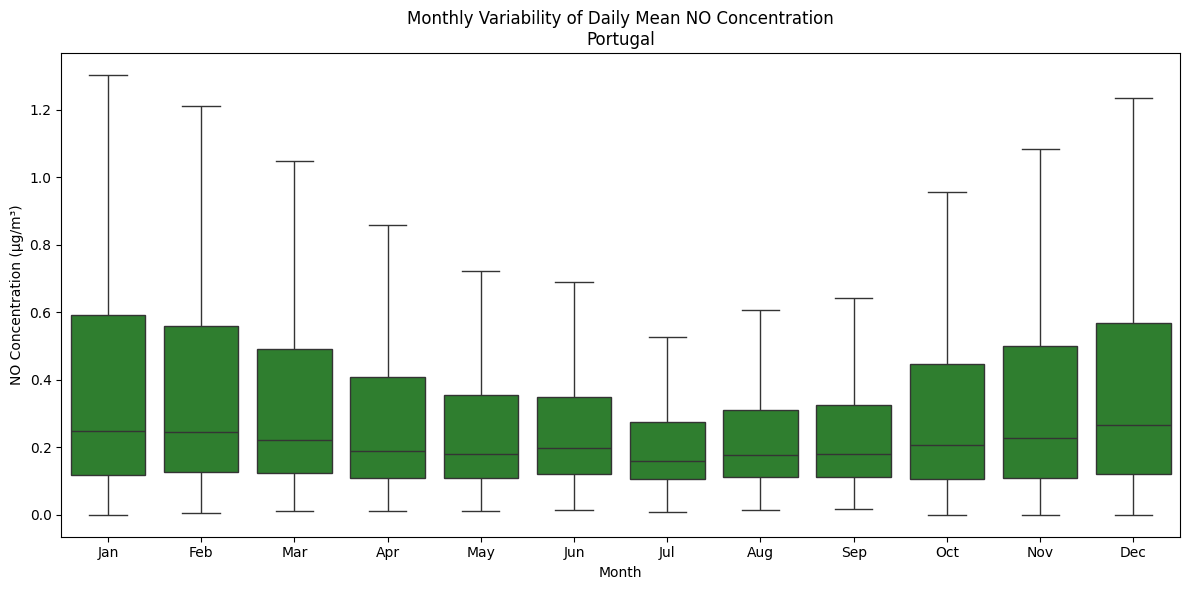

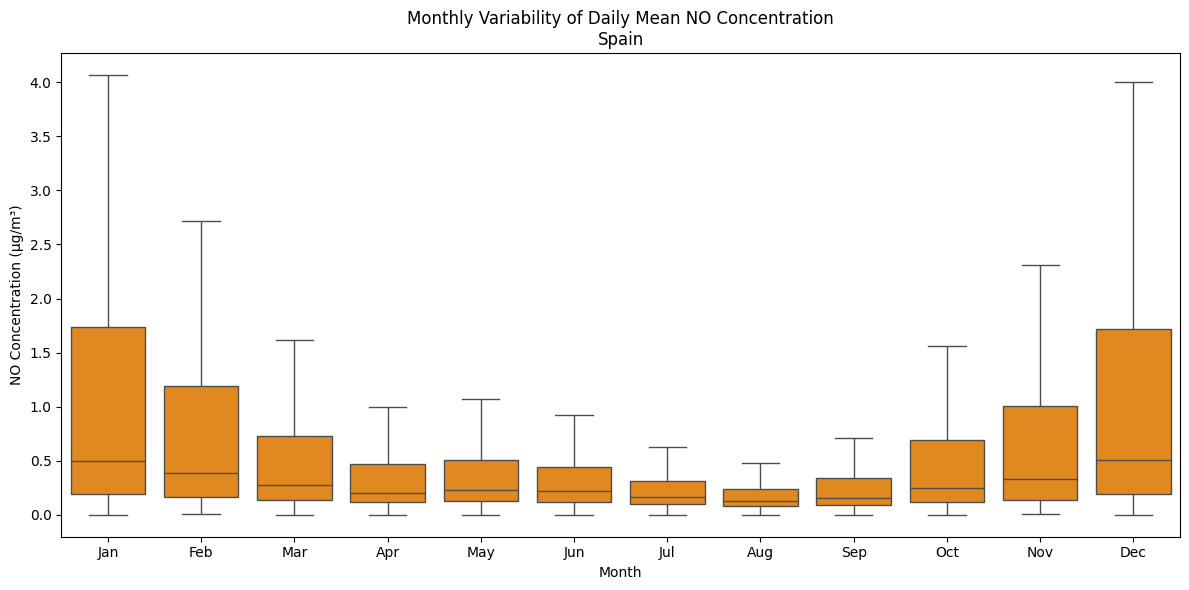

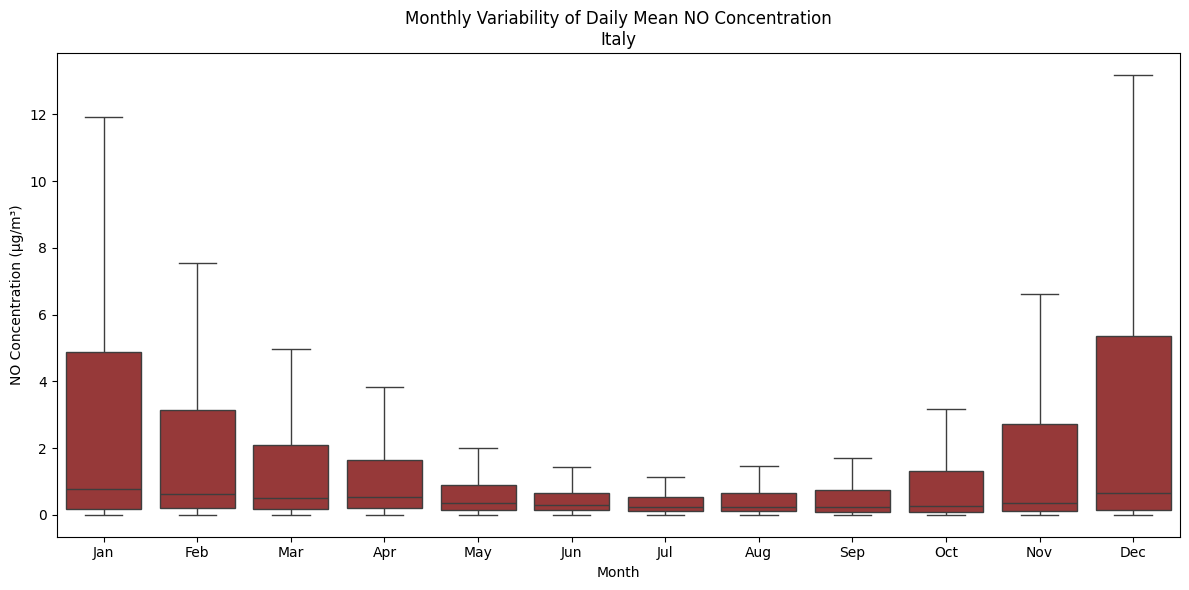

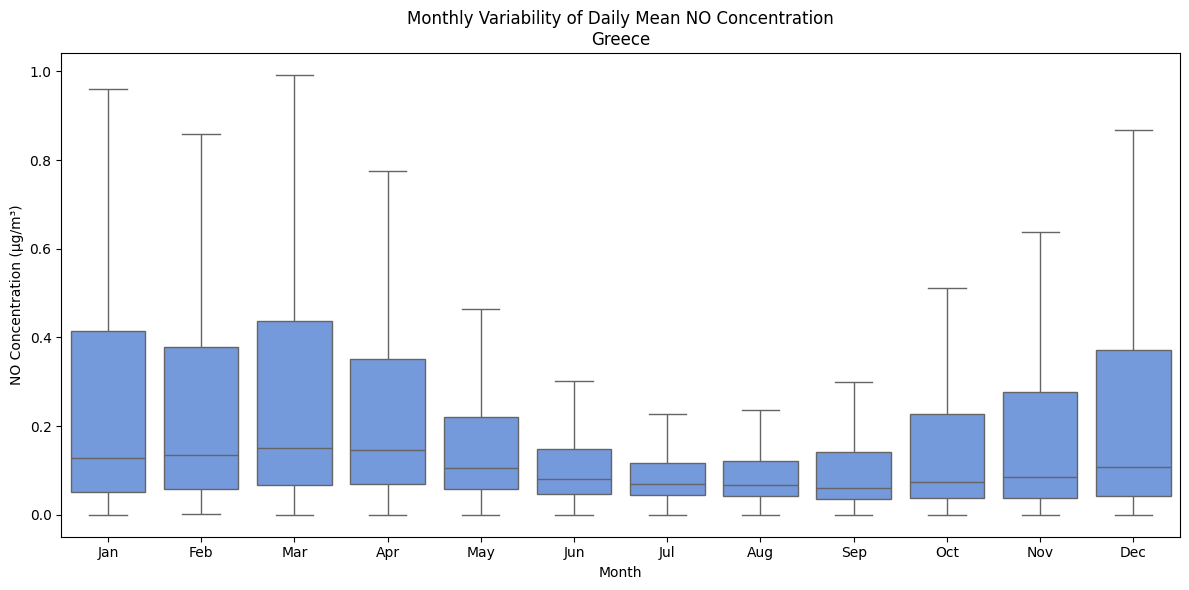

In [15]:
#Boxplot variability by month for every year

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no_file = r"E:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors for plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# === Load NO2 data ===
ds = xr.open_dataset(no_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Loop over regions ===
for region, mask_path in mask_files.items():
    # Load mask
    mask = xr.open_dataset(mask_path)["mask"] == 1

    # Apply mask to daily mean NO"
    no = ds["Mean"].where(mask)

    # Stack spatial dimensions
    no_stack = no.stack(space=("latitude", "longitude"))

    # Prepare data for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = no_stack.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]  # Remove NaNs
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region])
    plt.title(f"Monthly Variability of Daily Mean NO Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("NO Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()


PM2.5

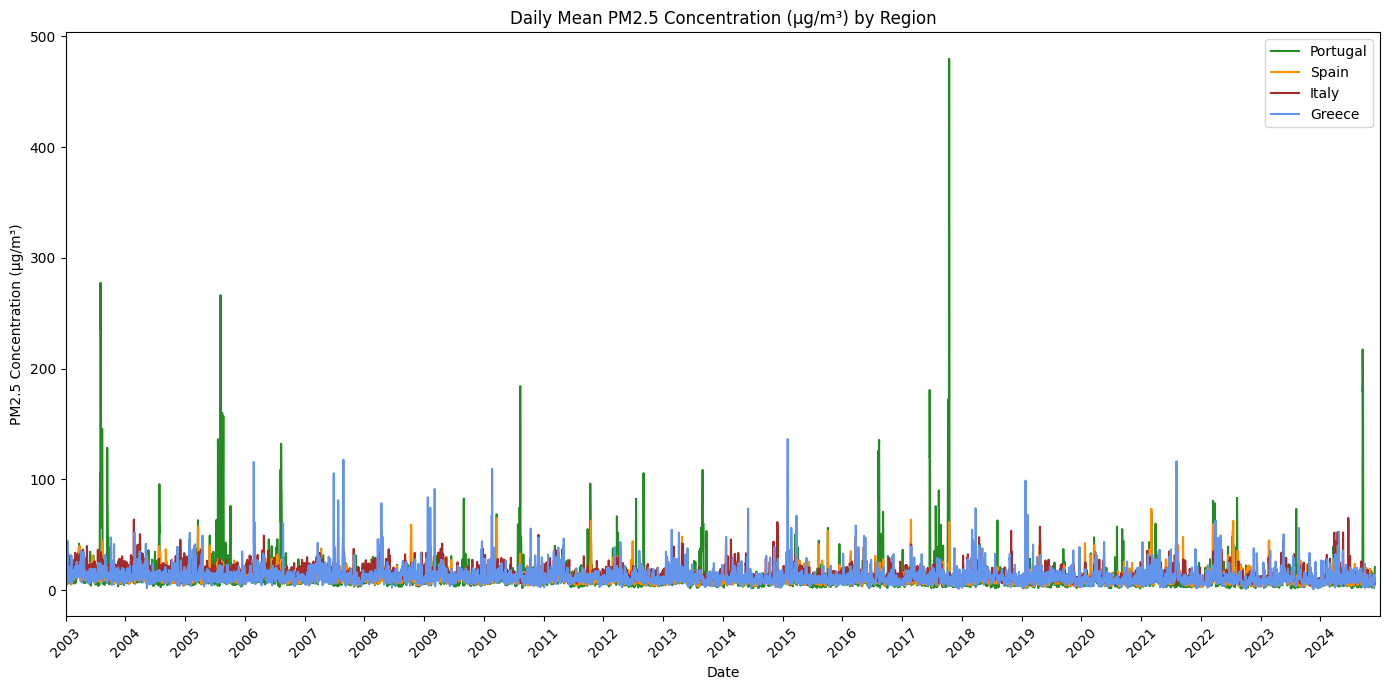

In [16]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm2p5_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM2.5 data and stack time ===
ds = xr.open_dataset(pm2p5_file)
pm2p5 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm2p5.sizes["time"]):
    y = int(pm2p5["Year"].values[i])
    m = int(pm2p5["Month"].values[i])
    d = int(pm2p5["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
pm2p5 = pm2p5.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = pm2p5.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean PM2.5 Concentration (µg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


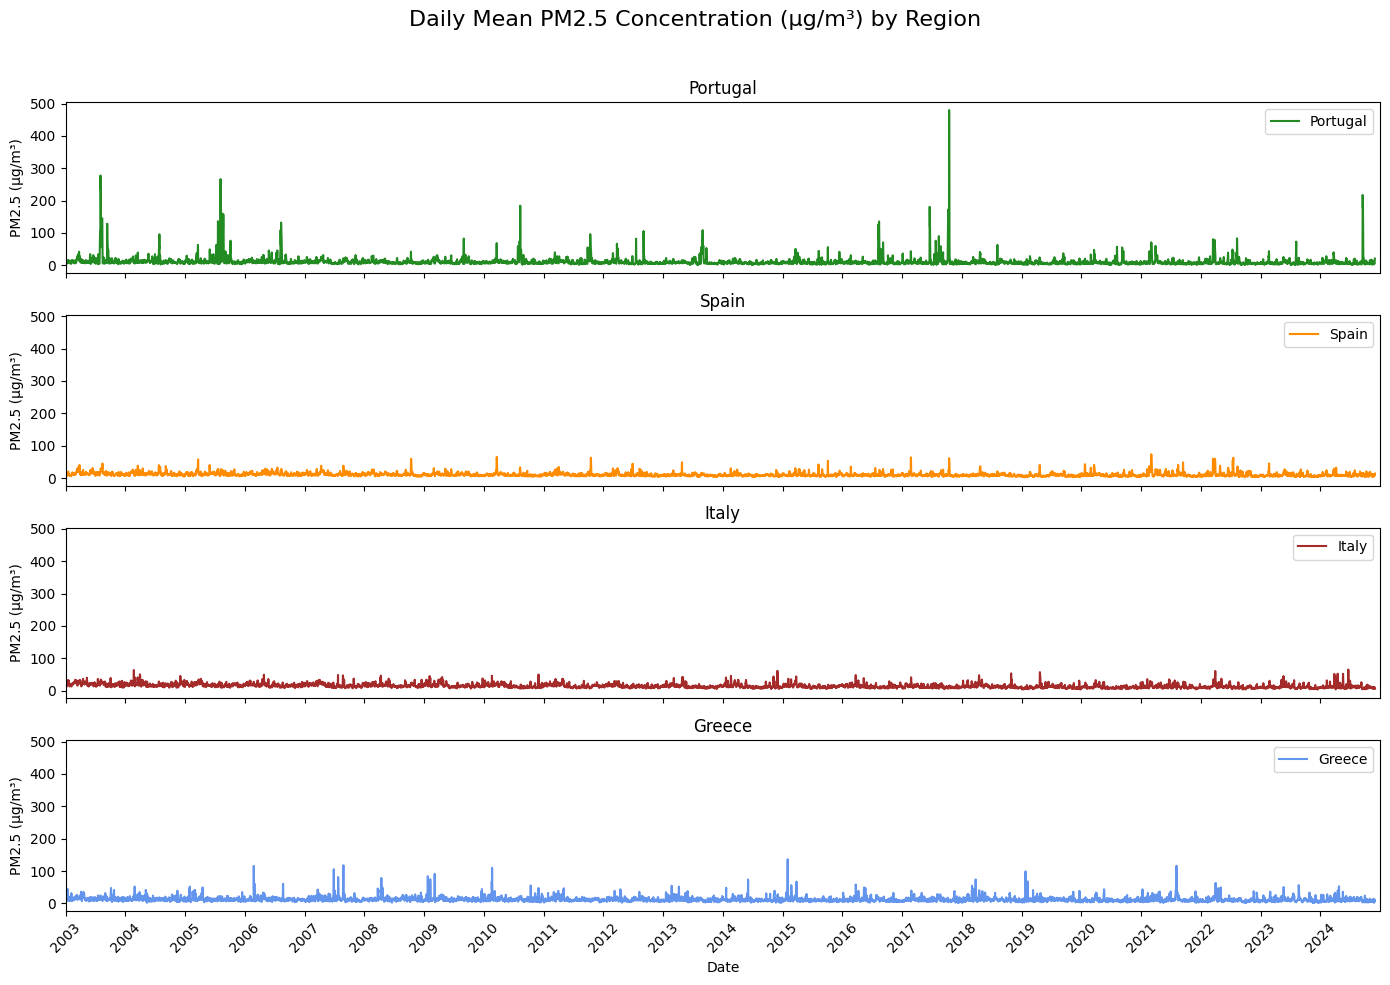

In [17]:
# Time series with daily averages by region (separated)

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm2p5_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM2.5 data and stack time ===
ds = xr.open_dataset(pm2p5_file)
pm2p5 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm2p5.sizes["time"]):
    y = int(pm2p5["Year"].values[i])
    m = int(pm2p5["Month"].values[i])
    d = int(pm2p5["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
pm2p5 = pm2p5.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = pm2p5.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean PM2.5 Concentration (µg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()


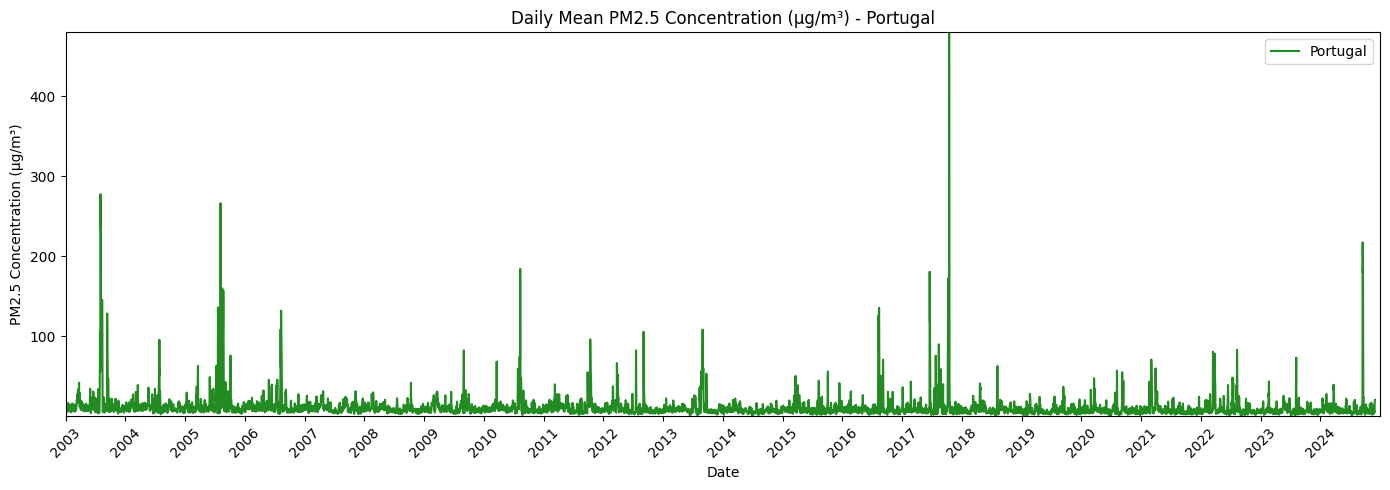

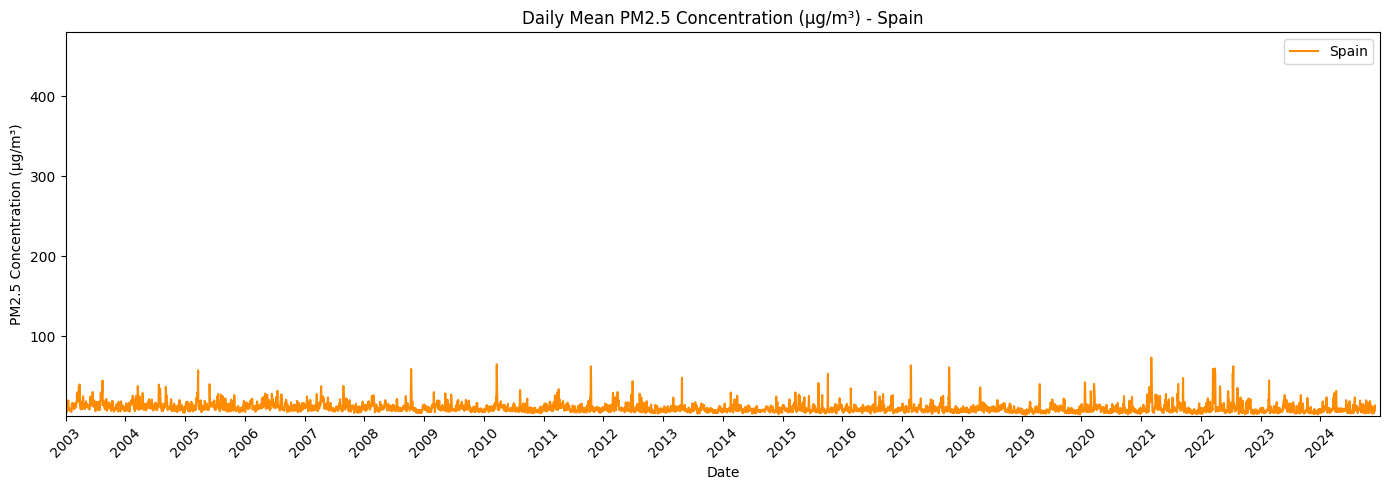

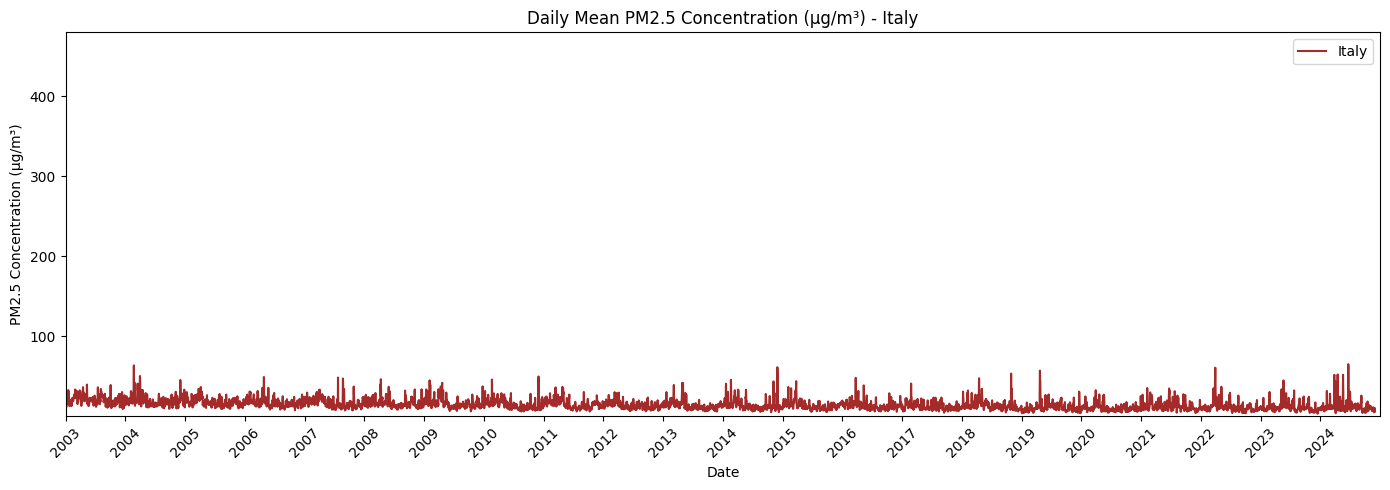

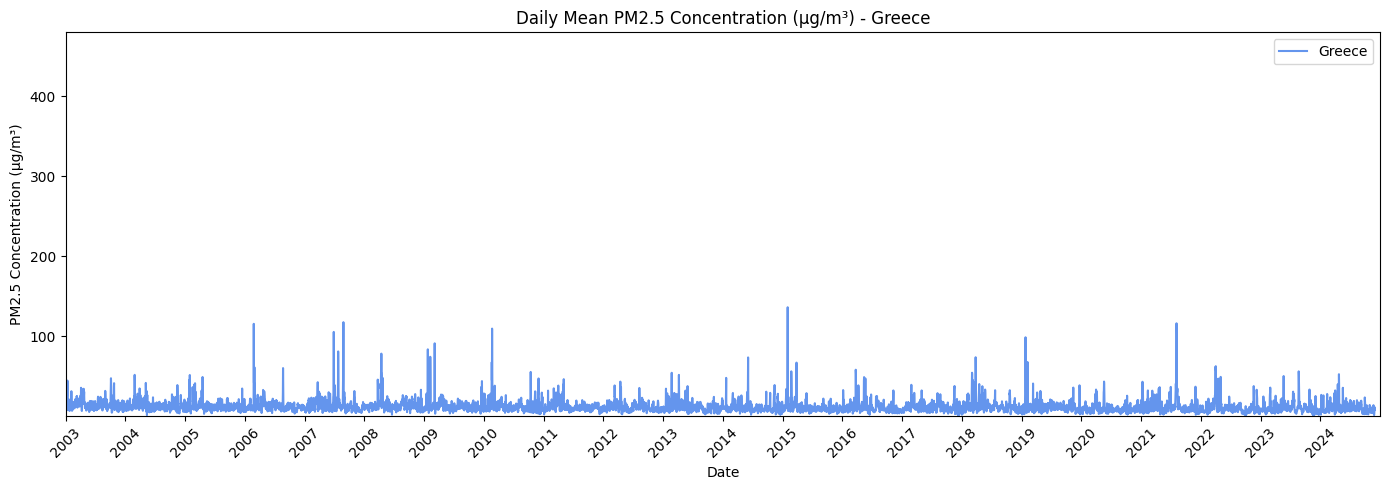

In [18]:
# Time series with daily averages by region (one plot per region)

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm2p5_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM2.5 data and stack time ===
ds = xr.open_dataset(pm2p5_file)
pm2p5 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm2p5.sizes["time"]):
    y = int(pm2p5["Year"].values[i])
    m = int(pm2p5["Month"].values[i])
    d = int(pm2p5["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
pm2p5 = pm2p5.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = pm2p5.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One figure per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits across all regions
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean PM2.5 Concentration (µg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Concentration (µg/m³)")
    plt.ylim(ymin, ymax)
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


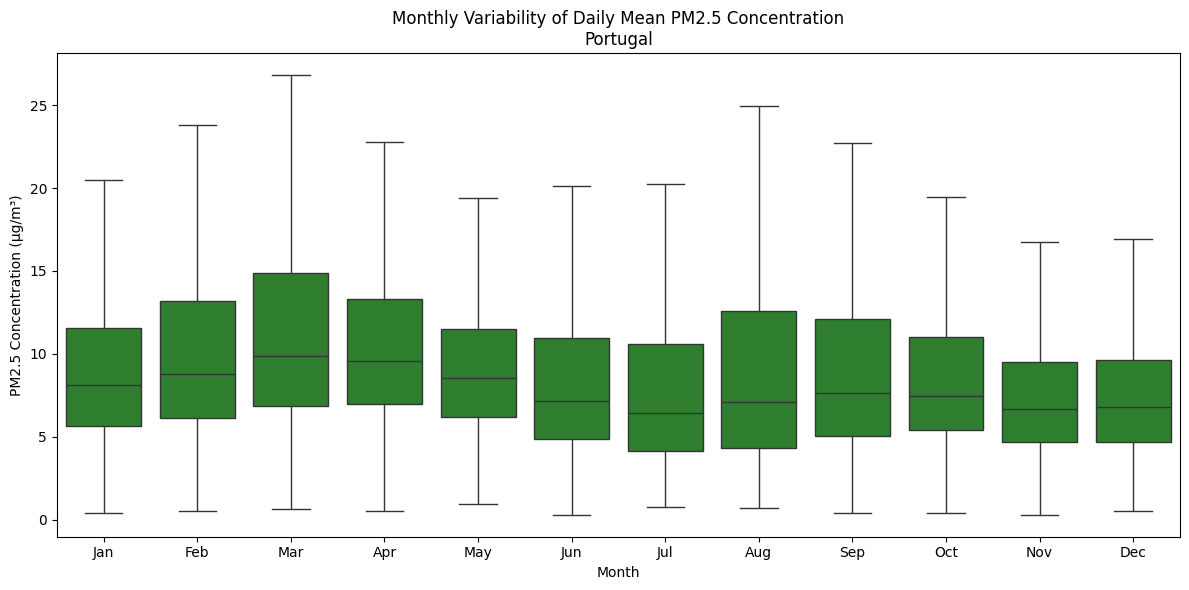

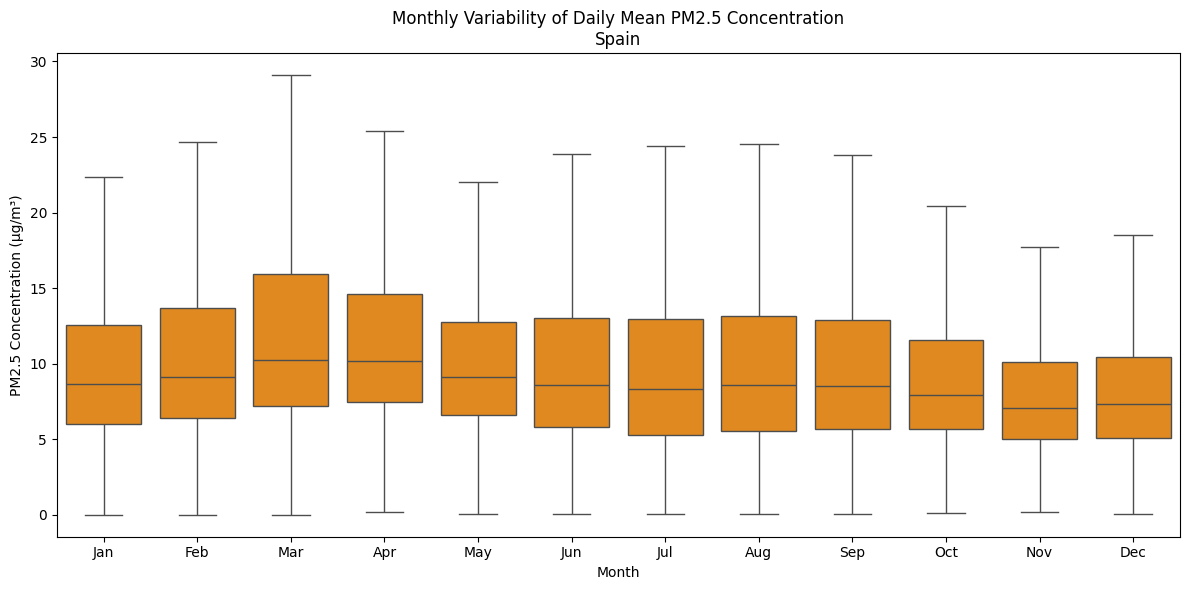

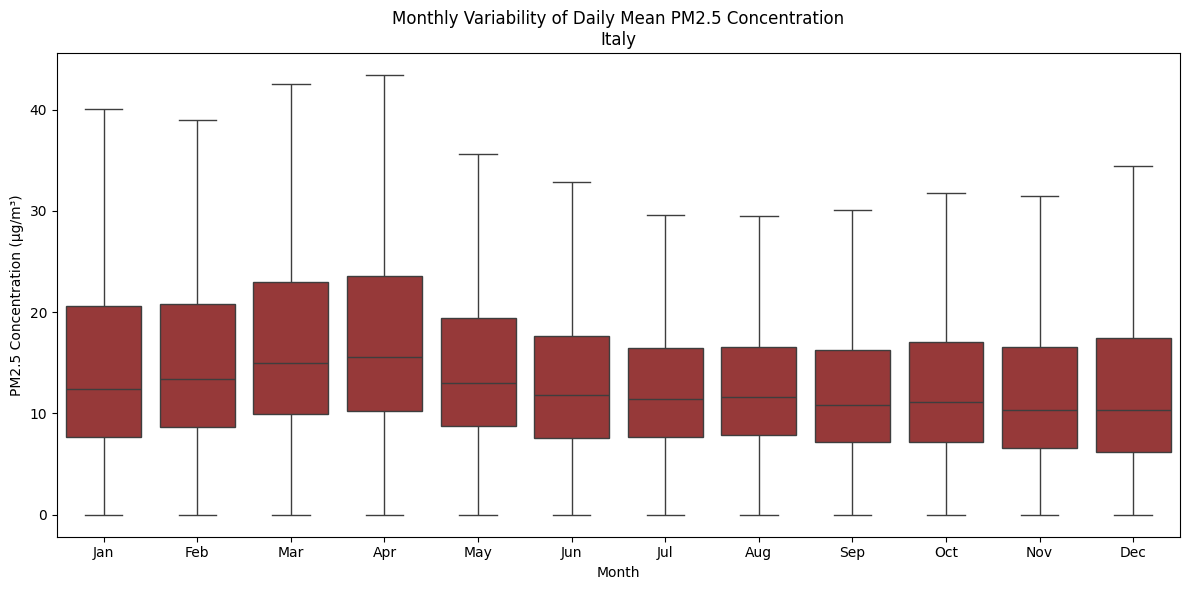

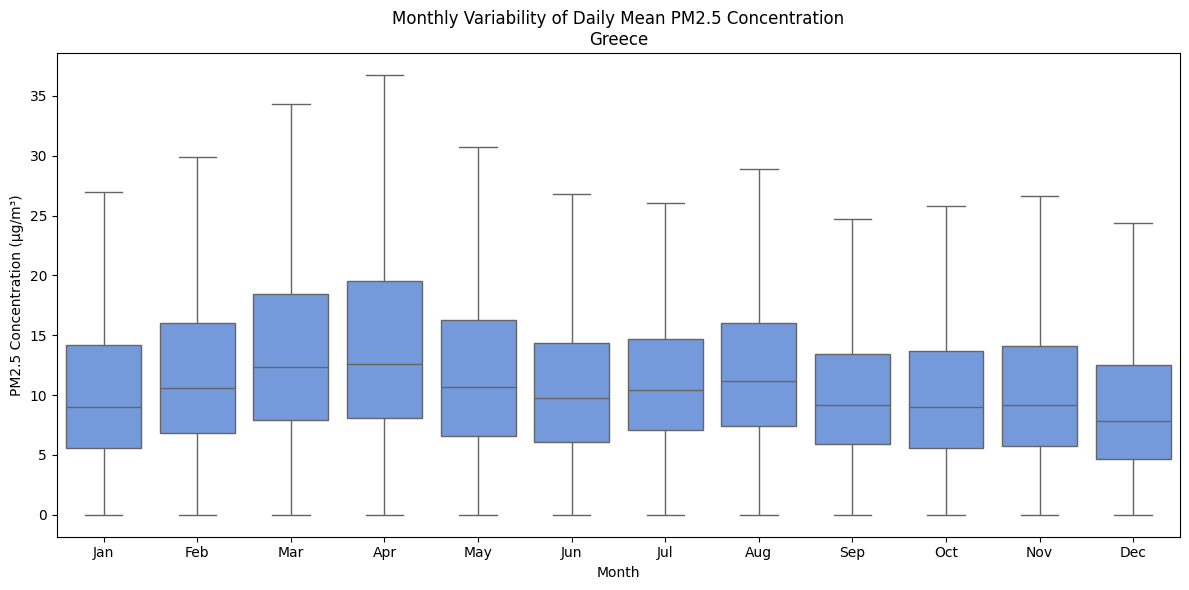

In [19]:
# Boxplot variability by month for every year – PM2.5

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
pm2p5_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors for plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# === Load PM2.5 data ===
ds = xr.open_dataset(pm2p5_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Loop over regions ===
for region, mask_path in mask_files.items():
    # Load mask
    mask = xr.open_dataset(mask_path)["mask"] == 1

    # Apply mask to daily mean PM2.5
    pm2p5 = ds["Mean"].where(mask)

    # Stack spatial dimensions
    pm2p5_stack = pm2p5.stack(space=("latitude", "longitude"))

    # Prepare data for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = pm2p5_stack.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]  # Remove NaNs
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region])
    plt.title(f"Monthly Variability of Daily Mean PM2.5 Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("PM2.5 Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()


In [20]:
# Exceedances of PM2.5 daily mean > 25 µg/m³

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
pm2p5_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(pm2p5_file)

threshold = 15.0  # µg/m³

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    pm2p5 = ds["Mean"].where(mask)

    # Calculate spatial average daily mean PM2.5
    regional_mean = pm2p5.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="PM2p5_mean").reset_index()
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["PM2p5_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove15")
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove15").fillna(0).astype(int)
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean PM2.5 concentration exceeds 15 µg/m³:\n")
print(table)



Number of days per year where daily mean PM2.5 concentration exceeds 15 µg/m³:

Region  Greece  Italy  Portugal  Spain
Year                                  
2003       130    315       100    121
2004       112    276        86    111
2005       101    255       100    103
2006        92    251        89    116
2007       120    217        87     86
2008       109    200        42     56
2009        88    182        66     53
2010       104    147        49     34
2011        65    177        68     59
2012        74    145        53     48
2013        90    106        50     18
2014        54    105        20     22
2015        51    113        49     48
2016        61    106        36     21
2017        69     81        75     39
2018        83    116        25     20
2019        76     58        28     24
2020        42     49        26     29
2021        87    100        39     65
2022        49     57        60     76
2023        66     65        36     34
2024        46     54 

PM10

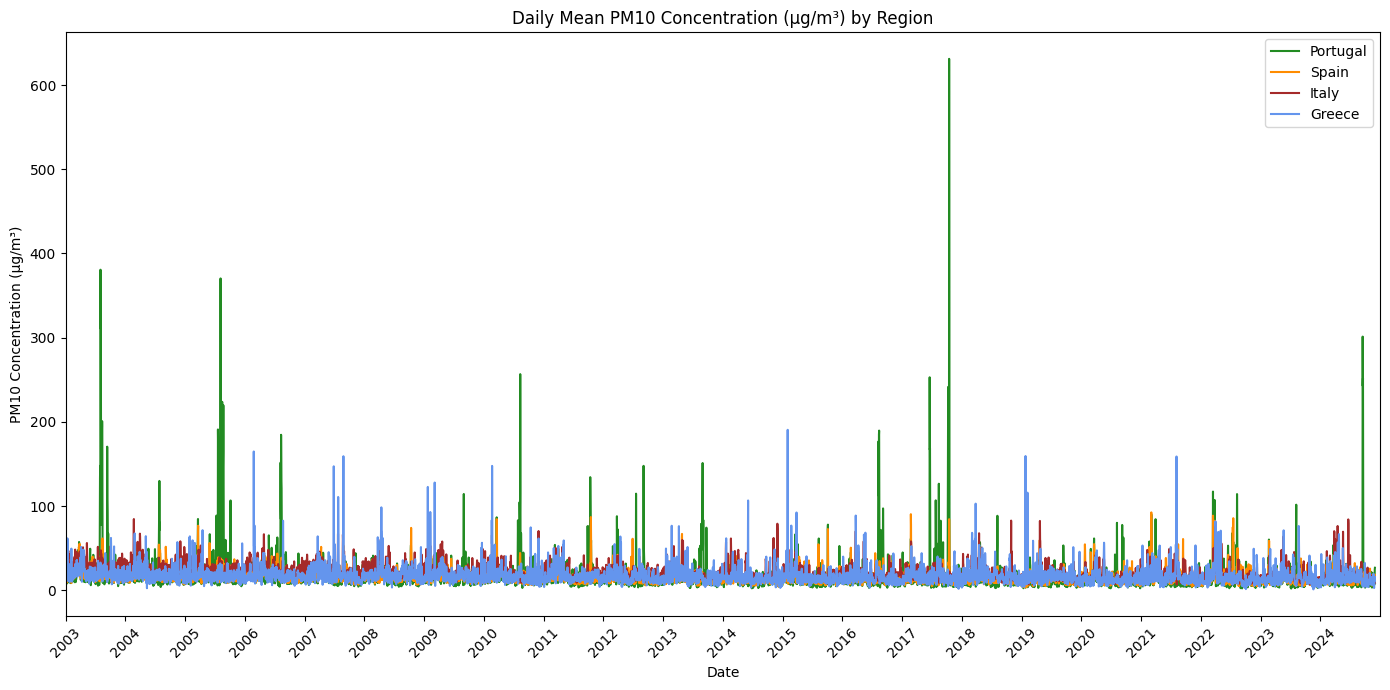

In [21]:
# Time series with daily averages by region (PM10)

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm10_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc" 
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM10 data and stack time ===
ds = xr.open_dataset(pm10_file) 
pm10 = ds["Mean"].stack(time=("Year", "Month", "Day"))  

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm10.sizes["time"]):
    y = int(pm10["Year"].values[i])
    m = int(pm10["Month"].values[i])
    d = int(pm10["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates

# Filter to valid dates
pm10 = pm10.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    masked = pm10.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean PM10 Concentration (µg/m³) by Region") 
plt.xlabel("Date")
plt.ylabel("PM10 Concentration (µg/m³)") 
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


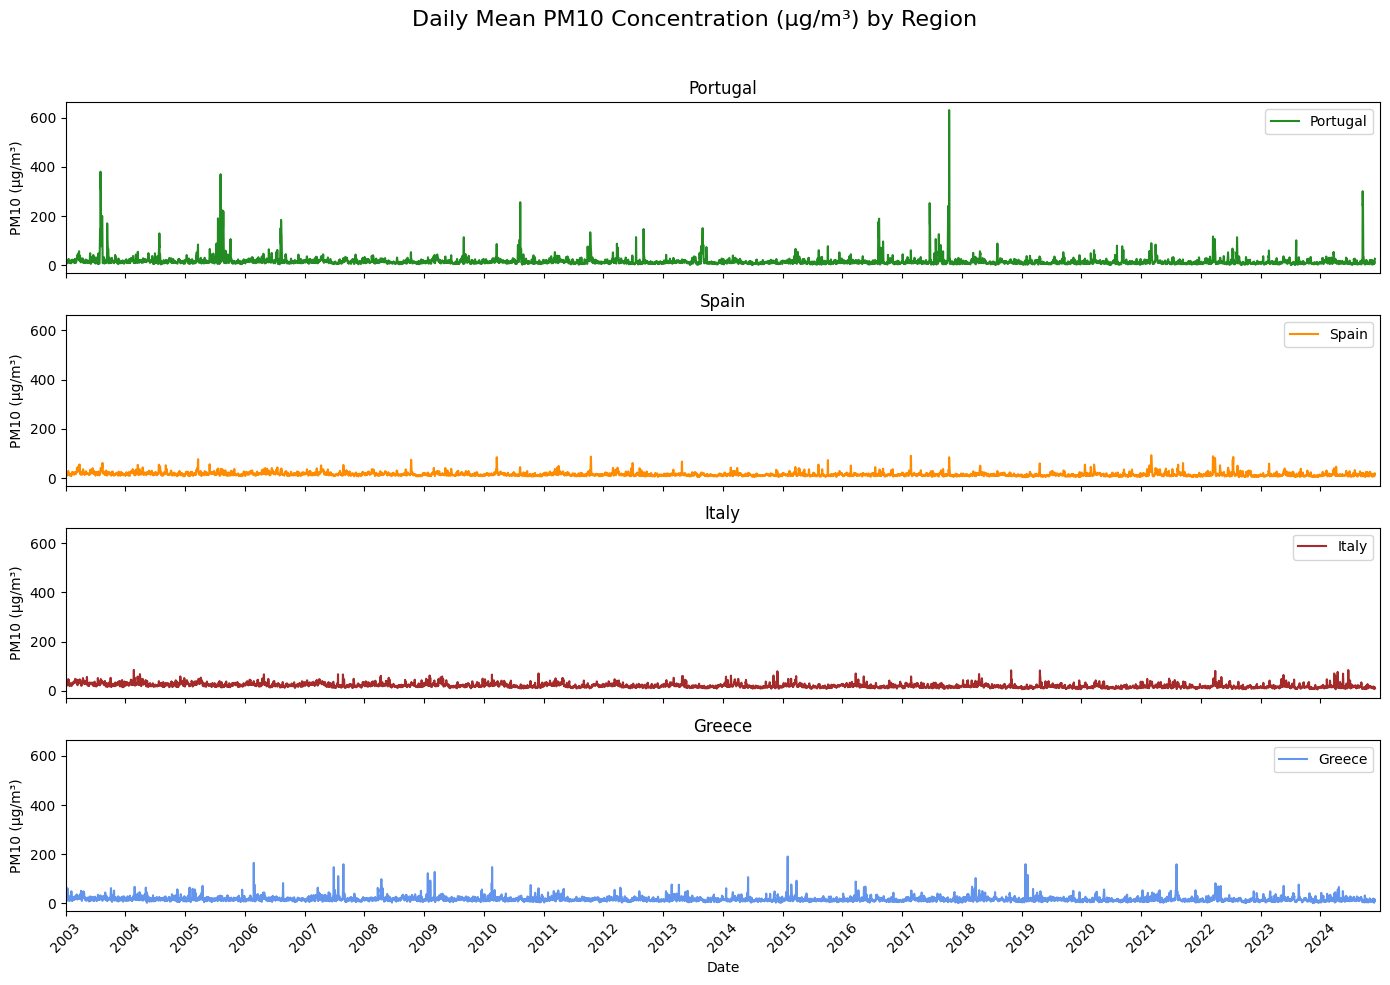

In [22]:
# Time series with daily averages by region (separated) for PM10

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm10_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"  
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM10 data and stack time ===
ds = xr.open_dataset(pm10_file) 
pm10 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm10.sizes["time"]):
    y = int(pm10["Year"].values[i])
    m = int(pm10["Month"].values[i])
    d = int(pm10["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Filter to valid dates
pm10 = pm10.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    masked = pm10.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("PM10 (µg/m³)") 
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean PM10 Concentration (µg/m³) by Region", fontsize=16) 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


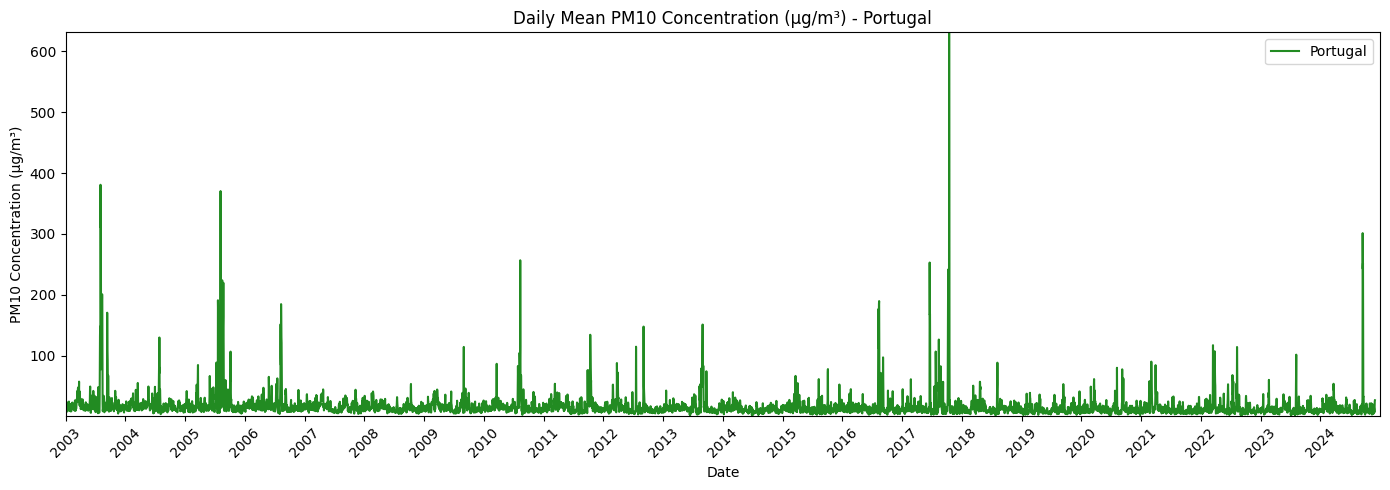

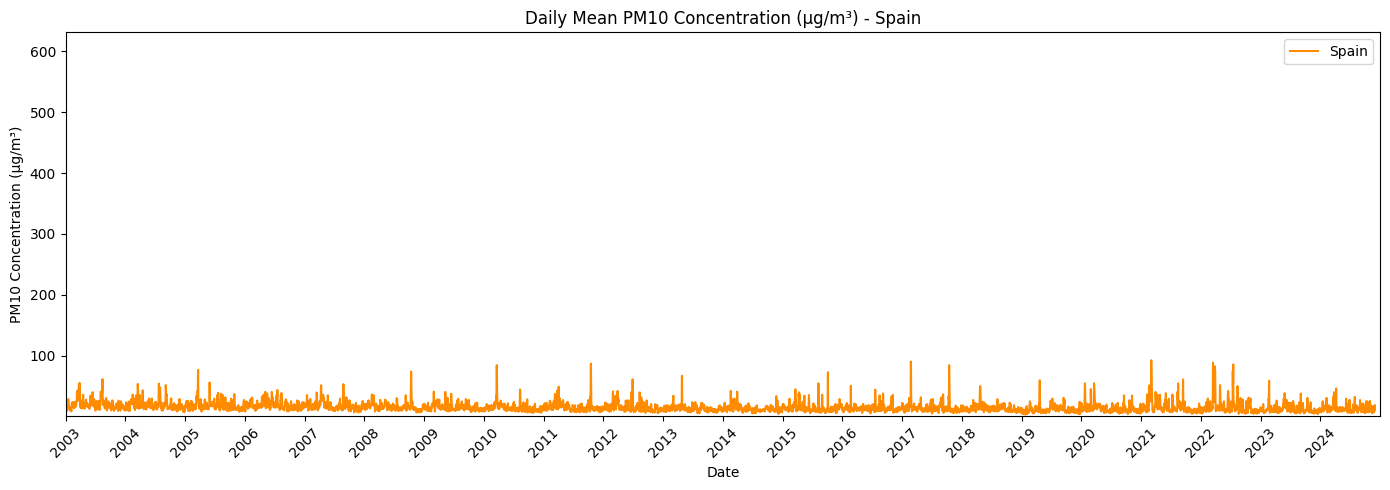

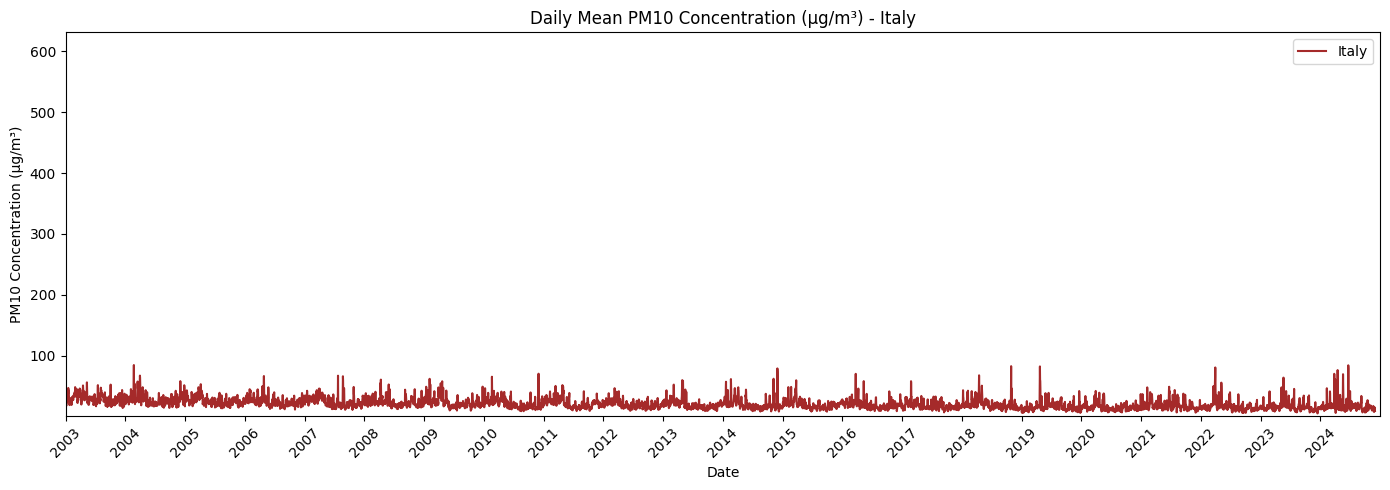

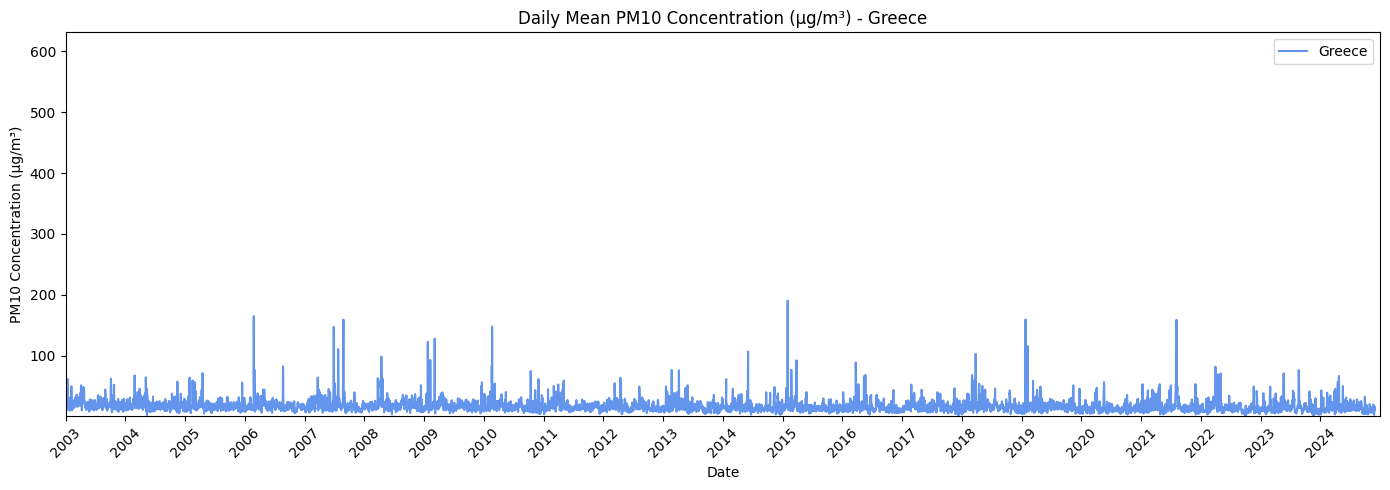

In [23]:
# Time series with daily averages by region (one plot per region) for PM10

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm10_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc" 
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM10 data and stack time ===
ds = xr.open_dataset(pm10_file) 
pm10 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm10.sizes["time"]):
    y = int(pm10["Year"].values[i])
    m = int(pm10["Month"].values[i])
    d = int(pm10["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Filter to valid dates
pm10 = pm10.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    masked = pm10.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One figure per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits across all regions
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean PM10 Concentration (µg/m³) - {region}")  
    plt.xlabel("Date")
    plt.ylabel("PM10 Concentration (µg/m³)")  
    plt.ylim(ymin, ymax)
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


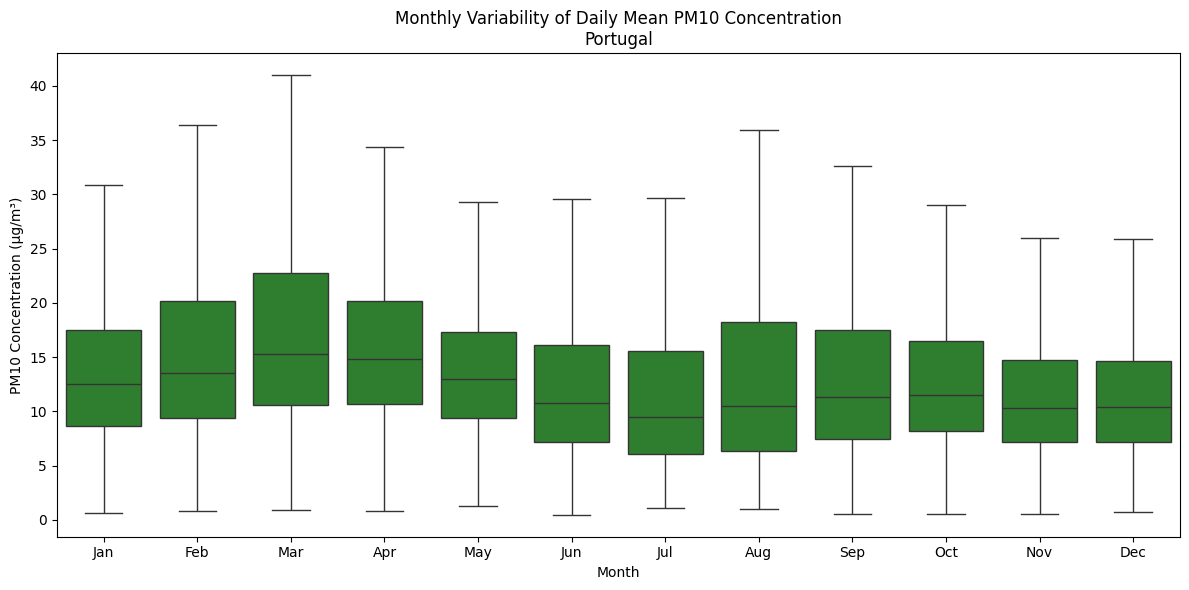

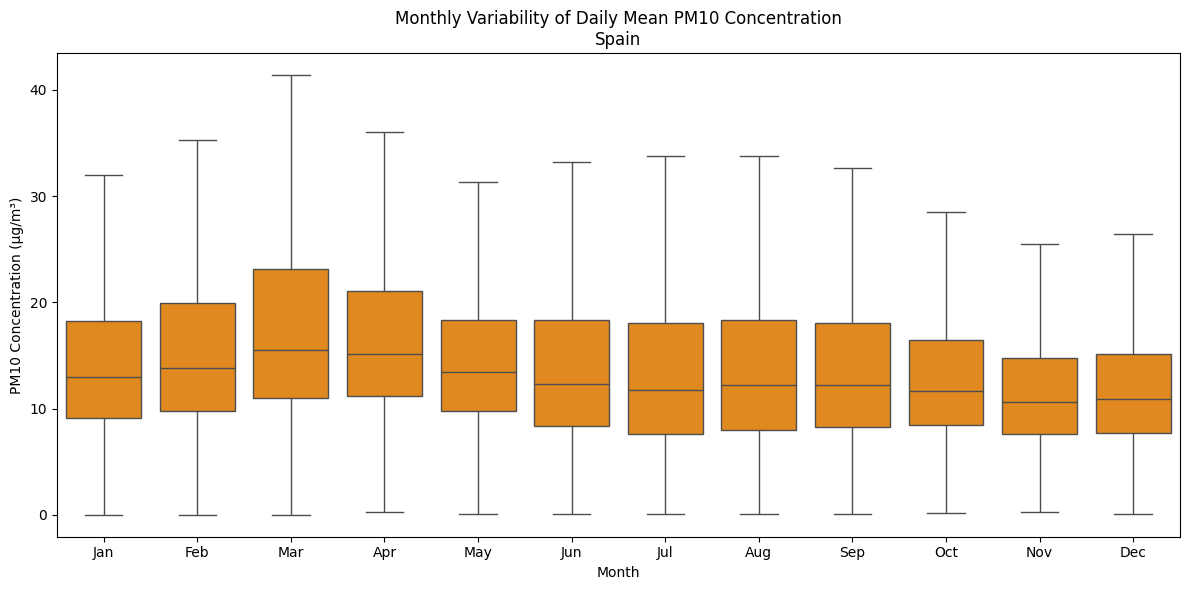

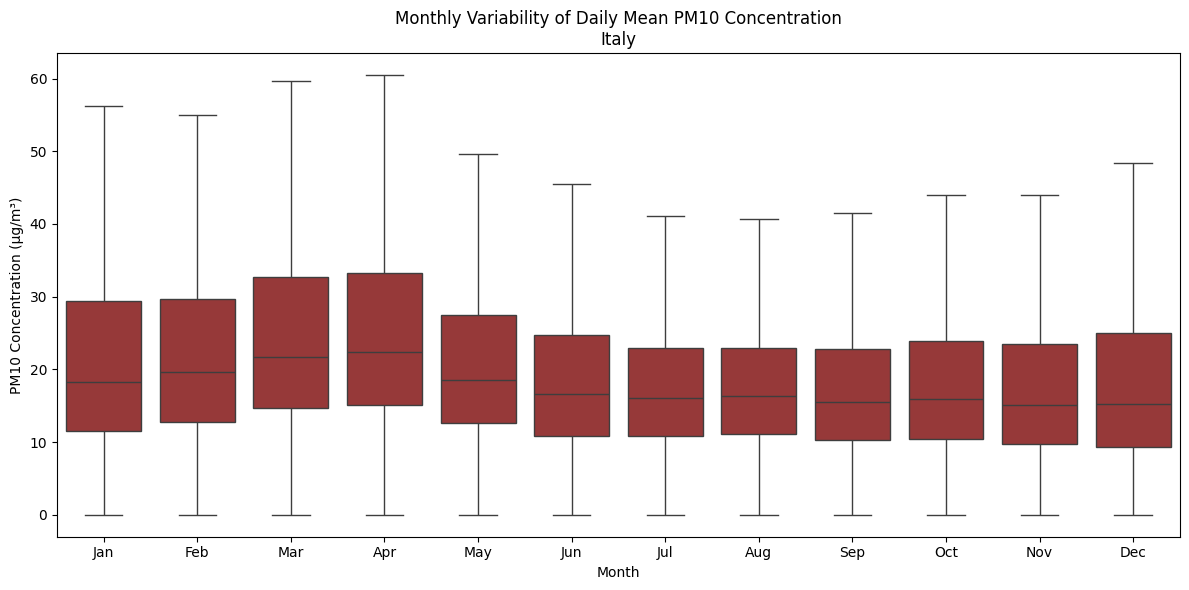

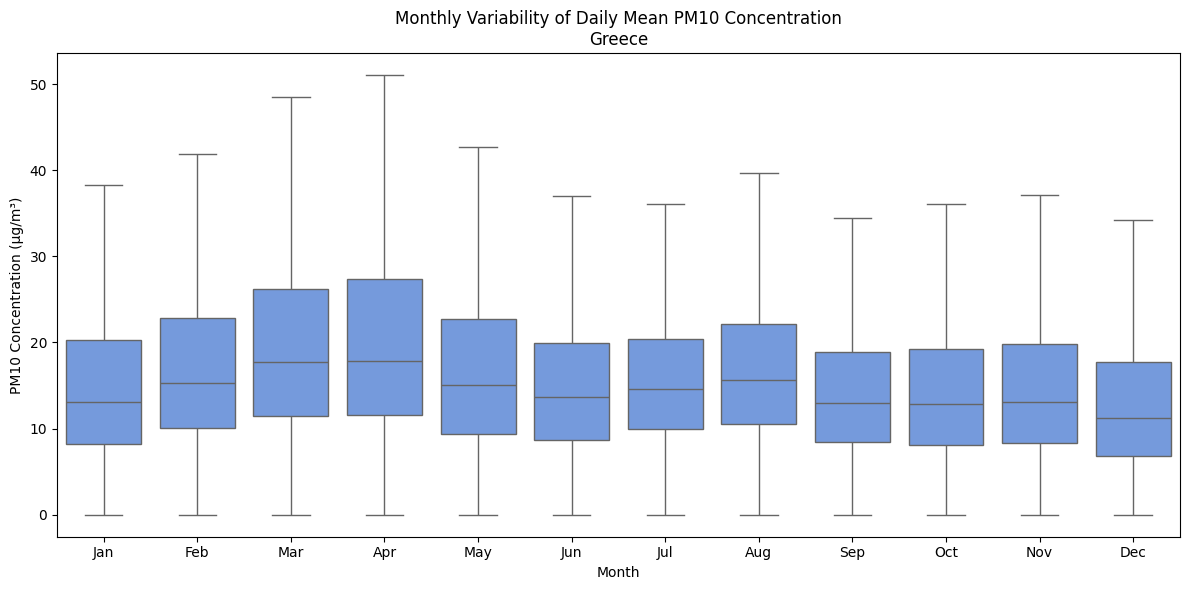

In [24]:
# Boxplot variability by month for every year – PM10

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
pm10_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"  
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors for plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# === Load PM10 data ===
ds = xr.open_dataset(pm10_file) 
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Loop over regions ===
for region, mask_path in mask_files.items():
    # Load mask
    mask = xr.open_dataset(mask_path)["mask"] == 1

    # Apply mask to daily mean PM10
    pm10 = ds["Mean"].where(mask) 

    # Stack spatial dimensions
    pm10_stack = pm10.stack(space=("latitude", "longitude"))  #

    # Prepare data for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = pm10_stack.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]  # Remove NaNs
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region])
    plt.title(f"Monthly Variability of Daily Mean PM10 Concentration\n{region}") 
    plt.xlabel("Month")
    plt.ylabel("PM10 Concentration (µg/m³)")  
    plt.tight_layout()
    plt.show()


In [25]:
# Exceedances of PM10 daily mean > 45 µg/m³

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
pm10_file = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"  
mask_dir = r"E:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(pm10_file) 

threshold = 45.0  # µg/m³ for PM10 

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    pm10 = ds["Mean"].where(mask) 

    # Calculate spatial average daily mean PM10
    regional_mean = pm10.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="PM10_mean").reset_index() 
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["PM10_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove45")  
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove45").fillna(0).astype(int) 
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean PM10 concentration exceeds 45 µg/m³:\n")
print(table) 



Number of days per year where daily mean PM10 concentration exceeds 45 µg/m³:

Region  Greece  Italy  Portugal  Spain
Year                                  
2003        10     12        29      4
2004         7     21         8      6
2005         9      3        41      4
2006         6      6        21      0
2007        14      9         0      3
2008        12      4         2      3
2009         9     13         3      0
2010         9      4        14      4
2011         7      5        13      4
2012         4      1        13      1
2013         6      7        19      2
2014         5     14         0      0
2015         7      5         7      2
2016         7      4        13      1
2017         3      2        27      5
2018        13      6         7      3
2019         8      5         1      2
2020         3      0         7      7
2021        15      2         9      9
2022        10      7        19     19
2023         6      4         4      1
2024         6      9  